In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np, get_pd_file_list
from main.draw_tools.decorations import b2helix, watermark
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.cm as cm
import matplotlib.ticker as ticker

import os
import pandas as pd
import numpy as np
from pandas import HDFStore
from os import path
from yaml import safe_load


Bad key mathtext.fallback_to_cm in file /home/belle2/jaeyoung/.config/matplotlib/stylelib/belle2.mplstyle, line 35 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/belle2/jaeyoung/.config/matplotlib/stylelib/belle2_modern.mplstyle, line 27 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/belle2/jaeyoung/.config/matplotlib/stylelib/belle2_serif.mplstyle, line 27 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an

Welcome to JupyROOT 6.24/06


In [2]:
base_filter='D0_M>1.8 & D0_M<1.9'
sig_base_filter='Dstarp_isSignal==1 & D0_M>1.8 & D0_M<1.9'

In [3]:
base_file = '/home/belle2/jaeyoung/storage_ghi/Ntuples_ghi/D2phipi0/'

file_list=str()
file_list = base_file + 'preext_maxFBDT_D2phipi0_mdst_100000_*.root'
# file_list = list()
# for i in ['ccbar/recon_*.root','uubar/recon_*.root','ddbar/recon_*.root','ssbar/recon_*.root', 'charged/recon_*.root', 'mixed/recon_*.root', 'taupair/recon_*.root',]:
#     number = format(i, '02')
#     file_name = base_file + i 
#     file_list.append(file_name)
# print(file_list)

In [4]:
# tree='antiKstar'
tree='phi'

# base_filter='D0_M>1.67 & D0_M<2.06'
# base_filter='D0_M>0'

# base_filter='D0_M>1.8 & D0_M<1.9'

variables = ['Pi0_Prob_base','Pi0_Prob_50MeV','Pi0_Prob_75MeV','Pi0_Prob_mask','D0_M']
# variables += [
#     'Dstarp_chiProb',
# #     'ROE_Mgg',
#     # 'soft_cosHelicityAngleMomentum',
# #     'soft_clusterZernikeMVA',
# #     #'soft_clusterE9E21',
# #     'soft_minC2TDist',
# #     # 'soft_clusterNHits',
# #     'veto_Easym',
#     'ROE_Dstar_chiProb',
# #     'asym_chiProb',
# #     'ROE_Mgg_75MeV',
# #     #'dM_pi0_75MeV',
# #     'soft_cosHelicityAngleMomentum_75MeV',
# #     'soft_clusterZernikeMVA_75MeV',
# #     #'soft_clusterE9E21_75MeV',
# #     # 'soft_clusterSecondMoment_75MeV',
# #     # 'soft_clusterLAT_75MeV',
# #     'soft_minC2TDist_75MeV',
# #     # 'soft_clusterNHits_75MeV',
# #     # 'veto_Easym_75MeV',
# #     'asym_chiProb_75MeV',
#     'ROE_Dstar_chiProb_75MeV',
# #     'ROE_Mgg_50MeV',
#     'ROE_Dstar_chiProb_50MeV',
# #     #'dM_pi0_75MeV',
# #     'soft_cosHelicityAngleMomentum_50MeV',
# #     # 'soft_clusterZernikeMVA_50MeV',
# #     # 'soft_clusterE9E21_50MeV',
# #     # 'soft_clusterSecondMoment_50MeV',
# #     #'soft_clusterLAT_50MeV',
# #     # 'soft_minC2TDist_50MeV',
# #     # 'soft_clusterNHits_50MeV',
# #     #'veto_Easym_50MeV',
# #     'asym_chiProb_50MeV',
# ]

variables += [
    'Dstarp_chiProb',
    'ROE_Mgg',
    'soft_cosHelicityAngleMomentum',
    'soft_clusterZernikeMVA',
    'soft_minC2TDist',
    'veto_Easym',
    'asym_chiProb',
    'ROE_Mgg_75MeV',
    'dM_pi0_75MeV',
    'soft_cosHelicityAngleMomentum_75MeV',
    'soft_clusterZernikeMVA_75MeV',
    'soft_clusterE9E21_75MeV',
    'soft_clusterSecondMoment_75MeV',
    'soft_clusterLAT_75MeV',
    'soft_minC2TDist_75MeV',
    'soft_clusterNHits_75MeV',
    'veto_Easym_75MeV',
    'asym_chiProb_75MeV',
    'ROE_Dstar_chiProb_75MeV',
    'ROE_Mgg_50MeV',
    'dM_pi0_75MeV',
    'soft_cosHelicityAngleMomentum_50MeV',
    'soft_clusterZernikeMVA_50MeV',
    'soft_clusterE9E21_50MeV',
    'soft_clusterSecondMoment_50MeV',
    'soft_clusterLAT_50MeV',
    'soft_minC2TDist_50MeV',
    'soft_clusterNHits_50MeV',
    'veto_Easym_50MeV',
    'asym_chiProb_50MeV',
    'ROE_Dstar_chiProb_50MeV',
    'ROE_Dstar_chiProb'
]

In [5]:
# massveto_pd_all = get_pd_file_list(file_list=file_list, tree=tree, base_filter=base_filter, variables=variables)
massveto_pd_all = get_pd(file=file_list, tree=tree, base_filter=base_filter, variables=variables)

massveto_pd_all['Max_base_50MeV'] = massveto_pd_all[['Pi0_Prob_base', 'Pi0_Prob_50MeV']].max(axis=1)
massveto_pd_all['Max_base_75MeV'] = massveto_pd_all[['Pi0_Prob_base', 'Pi0_Prob_75MeV']].max(axis=1)
massveto_pd_all['Max_base_50MeV_75MeV'] = massveto_pd_all[['Pi0_Prob_base', 'Pi0_Prob_50MeV','Pi0_Prob_75MeV']].max(axis=1)

input_line_80:10:7: warning: ignoring return value of function declared with 'nodiscard' attribute [-Wunused-result]
      ((const vector<double>*)obj)->empty();
      ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [6]:
# Pi0_bkg_cuts = 'gamma_genMotherPDG==111'
Pi0_bkg_cuts = 'D0_M>0'

# Pi0_bkg_cuts += ' & abs(Dstarp_Q-0.00593)<0.0006 & abs(antiKstar_M - 0.89555)< 0.06 & Dstarp_CMS_p>2.4'
Pi0_selected_pd_df_bkg = massveto_pd_all.query(Pi0_bkg_cuts)

In [7]:
# file = '/media/jykim/T7/storage/01_recon/antiKstar/D0_massveto_v2_half_1_pre_signalMC_recon_mdst_antiKstar_*.root'
# file = '/media/jykim/T7/storage/01_recon/antiKstar/D0_massveto_v2_half_1_sig_ext_signalMC_recon_mdst_antiKstar_*.root'
# file = '/media/jykim/T7/storage/01_recon/rho/D0_massveto_v2_half_1_pre_signalMC_recon_mdst_rho_*.root'
# file = '/media/jykim/T7/storage/01_recon/rho/D0_massveto_v2_half_1_sig_ext_signalMC_recon_mdst_rho_*.root'


file = '/home/belle2/jaeyoung/storage_ghi/Ntuples_ghi/D2phigamma/preext_maxFBDT_D2phigamma_mdst_100000_*.root'
# base_filter='Dstarp_isSignal==1'
# base_filter+='& D0_M>1.8 & D0_M<1.9'
# base_filter+=' & D0_M>1.67 & D0_M<2.06'

pd_df_signal = get_pd(file=file, tree=tree,variables=variables ,base_filter=sig_base_filter)

pd_df_signal['Max_base_50MeV'] = pd_df_signal[['Pi0_Prob_base', 'Pi0_Prob_50MeV']].max(axis=1)
pd_df_signal['Max_base_75MeV'] = pd_df_signal[['Pi0_Prob_base', 'Pi0_Prob_75MeV']].max(axis=1)

pd_df_signal['Max_base_50MeV_75MeV'] = pd_df_signal[['Pi0_Prob_base', 'Pi0_Prob_50MeV','Pi0_Prob_75MeV']].max(axis=1)

In [8]:
def eff(Total_row_num=None, Reduced_row_num=None):
    eff = Reduced_row_num/Total_row_num
    return eff

def Bkg_rej(Total_row_num=None, Reduced_row_num=None):
    rejection = (Total_row_num - Reduced_row_num)/Total_row_num

    return rejection

In [9]:
def df_fbdt_eff_rej(df_signal, df_bkg,cut_var='cut_variable', step=0.001):
# step = 0.001
    pd_df_signal = df_signal
    Pi0_selected_pd_df_bkg = df_bkg
    sig_Total_row_num = pd_df_signal.shape[0]
    Pi0_bkg_Total_row_num = Pi0_selected_pd_df_bkg.shape[0]
    cut_value = 1

    data_dict = dict.fromkeys(['sig_eff', 'bkg_rej'])
    data_dict['sig_eff']=list()
    data_dict['bkg_rej']=list()
    print(data_dict)
    # sig_eff_list = list()
    # bkg_rej_list = list()
    sig_Reduced_row_num = pd_df_signal.shape[0]
    data_dict['sig_eff'].append(eff(sig_Total_row_num, sig_Reduced_row_num ))
    Pi0_bkg_Reduced_row_num = Pi0_selected_pd_df_bkg.shape[0]
    data_dict['bkg_rej'].append(Bkg_rej(Pi0_bkg_Total_row_num, Pi0_bkg_Reduced_row_num)) 
    for i in range(0,1200):     
        if cut_value > 0:
            cut_value     = 1 - i * step
            #print(cut_value)
            sig_Reduced_row_num = pd_df_signal[(pd_df_signal[cut_var]<cut_value) ].shape[0]
            data_dict['sig_eff'].append(eff(sig_Total_row_num, sig_Reduced_row_num ))
            #sig_eff_list.append(eff(sig_Total_row_num, sig_Reduced_row_num ))

            Pi0_bkg_Reduced_row_num = Pi0_selected_pd_df_bkg[(Pi0_selected_pd_df_bkg[cut_var]<cut_value) ].shape[0]
            data_dict['bkg_rej'].append(Bkg_rej(Pi0_bkg_Total_row_num, Pi0_bkg_Reduced_row_num))

            #bkg_rej_list.append(Bkg_rej(Pi0_bkg_Total_row_num, Pi0_bkg_Reduced_row_num))        

    df_base = pd.DataFrame(data_dict)    
                    
    return df_base

In [10]:
def df_fbdt_eff_rej_sig_1(df_signal, df_bkg,cut_var='cut_variable', step=0.001):
# step = 0.001
    pd_df_signal = df_signal
    Pi0_selected_pd_df_bkg = df_bkg
    sig_Total_row_num = pd_df_signal.shape[0]
    Pi0_bkg_Total_row_num = Pi0_selected_pd_df_bkg.shape[0]
    cut_value = 0

    data_dict = dict.fromkeys(['sig_eff', 'bkg_rej'])
    data_dict['sig_eff']=list()
    data_dict['bkg_rej']=list()
    print(data_dict)
    # sig_eff_list = list()
    # bkg_rej_list = list()
    sig_Reduced_row_num = pd_df_signal.shape[0]
    data_dict['sig_eff'].append(eff(sig_Total_row_num, sig_Reduced_row_num ))
    Pi0_bkg_Reduced_row_num = Pi0_selected_pd_df_bkg.shape[0]
    data_dict['bkg_rej'].append(Bkg_rej(Pi0_bkg_Total_row_num, Pi0_bkg_Reduced_row_num)) 
    for i in range(0,1200):     
        if cut_value < 1:
            cut_value     = 0 + i * step
            #print(cut_value)
            sig_Reduced_row_num = pd_df_signal[(pd_df_signal[cut_var]>cut_value) ].shape[0]
            data_dict['sig_eff'].append(eff(sig_Total_row_num, sig_Reduced_row_num ))
            #sig_eff_list.append(eff(sig_Total_row_num, sig_Reduced_row_num ))

            Pi0_bkg_Reduced_row_num = Pi0_selected_pd_df_bkg[(Pi0_selected_pd_df_bkg[cut_var]>cut_value) ].shape[0]
            data_dict['bkg_rej'].append(Bkg_rej(Pi0_bkg_Total_row_num, Pi0_bkg_Reduced_row_num))

            #bkg_rej_list.append(Bkg_rej(Pi0_bkg_Total_row_num, Pi0_bkg_Reduced_row_num))        

    df_base = pd.DataFrame(data_dict)    
                    
    return df_base

# max FBDT

In [11]:
cut_var = 'Pi0_Prob_base'
df_base = df_fbdt_eff_rej(df_signal=pd_df_signal,df_bkg=Pi0_selected_pd_df_bkg,cut_var=cut_var, step=0.001)

{'sig_eff': [], 'bkg_rej': []}


In [12]:
cut_var = 'Pi0_Prob_50MeV'
df_fbdt_50MeV = df_fbdt_eff_rej(df_signal=pd_df_signal,df_bkg=Pi0_selected_pd_df_bkg,cut_var=cut_var, step=0.001)

{'sig_eff': [], 'bkg_rej': []}


In [13]:
cut_var = 'Pi0_Prob_75MeV'
df_fbdt_75MeV = df_fbdt_eff_rej(df_signal=pd_df_signal,df_bkg=Pi0_selected_pd_df_bkg,cut_var=cut_var, step=0.001)

{'sig_eff': [], 'bkg_rej': []}


In [14]:
cut_var = 'Max_base_50MeV'
df_Max_base_50MeV = df_fbdt_eff_rej(df_signal=pd_df_signal,df_bkg=Pi0_selected_pd_df_bkg,cut_var=cut_var, step=0.001)

{'sig_eff': [], 'bkg_rej': []}


In [15]:
cut_var = 'Max_base_75MeV'
df_Max_base_75MeV = df_fbdt_eff_rej(df_signal=pd_df_signal,df_bkg=Pi0_selected_pd_df_bkg,cut_var=cut_var, step=0.001)

{'sig_eff': [], 'bkg_rej': []}


In [16]:
cut_var = 'Max_base_50MeV_75MeV'    
df_Max_base_50MeV_75MeV = df_fbdt_eff_rej(df_signal=pd_df_signal,df_bkg=Pi0_selected_pd_df_bkg,cut_var=cut_var, step=0.001)

{'sig_eff': [], 'bkg_rej': []}


In [19]:
# df_base

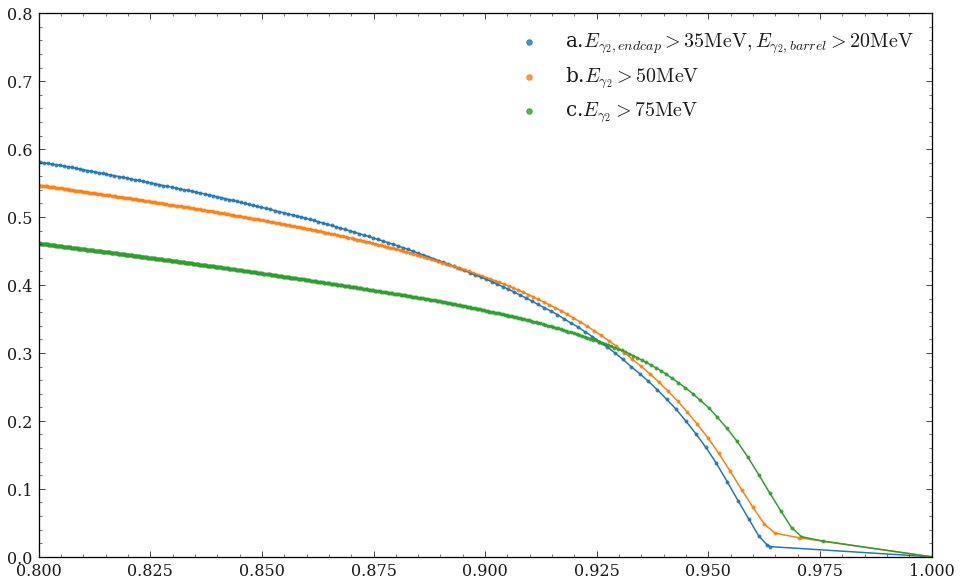

In [21]:
plt.figure(figsize=(16, 10))

# mycolormap = sns.cubehelix_palette(6, start=1.5, rot=1.5, dark=0.3, light=.8, reverse=True)
mycolormap = sns.color_palette("tab10")
# plt.figure(figsize=(15, 12))

plt.scatter(df_base.sig_eff, df_base.bkg_rej , alpha=0.8, marker='.',color=mycolormap[0],label=r'a.$E_{\gamma_2,endcap}>35\mathrm{MeV},E_{\gamma_2,barrel}>20\mathrm{MeV}$')
plt.scatter(df_fbdt_50MeV.sig_eff, df_fbdt_50MeV.bkg_rej, alpha=0.8, marker='.',color=mycolormap[1],label=r'b.$E_{\gamma_2}>50\mathrm{MeV}$')
plt.scatter(df_fbdt_75MeV.sig_eff, df_fbdt_75MeV.bkg_rej, alpha=0.8, marker='.',color=mycolormap[2],label=r'c.$E_{\gamma_2}>75\mathrm{MeV}$')
# plt.scatter(df_Max_base_50MeV.sig_eff, df_Max_base_50MeV.bkg_rej, alpha=0.8, marker='.',color=mycolormap[3],label=r'd.Max(a,b)')
# plt.scatter(df_Max_base_75MeV.sig_eff, df_Max_base_75MeV.bkg_rej, alpha=0.8, marker='.',color=mycolormap[4],label=r'e.Max(a,c)')
# plt.scatter(df_Max_base_50MeV_75MeV.sig_eff, df_Max_base_50MeV_75MeV.bkg_rej, alpha=0.8, marker='.',color=mycolormap[5],label=r'f.Max(a,b,c)')


plt.plot(df_base.sig_eff.values, df_base.bkg_rej.values,color=mycolormap[0])
plt.plot(df_fbdt_50MeV.sig_eff.values, df_fbdt_50MeV.bkg_rej.values,color=mycolormap[1])
plt.plot(df_fbdt_75MeV.sig_eff.values, df_fbdt_75MeV.bkg_rej.values,color=mycolormap[2])
# plt.plot(df_Max_base_50MeV.sig_eff, df_Max_base_50MeV.bkg_rej,color=mycolormap[3])
# plt.plot(df_Max_base_75MeV.sig_eff, df_Max_base_75MeV.bkg_rej,color=mycolormap[4])
# plt.plot(df_Max_base_50MeV_75MeV.sig_eff, df_Max_base_50MeV_75MeV.bkg_rej,color=mycolormap[5])


ax = plt.gca()
ax.set_xlim(0.8,1) 
# ax.set_xlim(0,1)   
ax.set_ylim(0.,0.8)

# plt.legend()
legend = plt.legend(fontsize=20)
for handle in legend.legendHandles:
    handle.set_sizes([120])  # Adjust the marker size here
# plt.tight_layout()

plt.savefig("/home/belle2/jaeyoung/plots/2024_Jan_B2GM/20240129_oneBDT_sigregion_ROC.png")

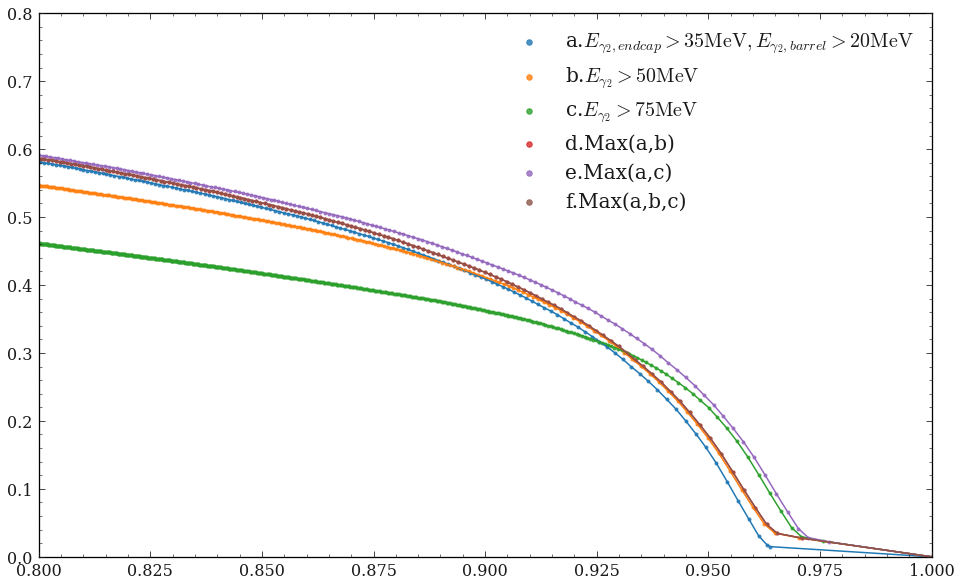

In [66]:
plt.figure(figsize=(16, 10))

# mycolormap = sns.cubehelix_palette(6, start=1.5, rot=1.5, dark=0.3, light=.8, reverse=True)
mycolormap = sns.color_palette("tab10")
# plt.figure(figsize=(15, 12))

plt.scatter(df_base.sig_eff, df_base.bkg_rej , alpha=0.8, marker='.',color=mycolormap[0],label=r'a.$E_{\gamma_2,endcap}>35\mathrm{MeV},E_{\gamma_2,barrel}>20\mathrm{MeV}$')
plt.scatter(df_fbdt_50MeV.sig_eff, df_fbdt_50MeV.bkg_rej, alpha=0.8, marker='.',color=mycolormap[1],label=r'b.$E_{\gamma_2}>50\mathrm{MeV}$')
plt.scatter(df_fbdt_75MeV.sig_eff, df_fbdt_75MeV.bkg_rej, alpha=0.8, marker='.',color=mycolormap[2],label=r'c.$E_{\gamma_2}>75\mathrm{MeV}$')
plt.scatter(df_Max_base_50MeV.sig_eff, df_Max_base_50MeV.bkg_rej, alpha=0.8, marker='.',color=mycolormap[3],label=r'd.Max(a,b)')
plt.scatter(df_Max_base_75MeV.sig_eff, df_Max_base_75MeV.bkg_rej, alpha=0.8, marker='.',color=mycolormap[4],label=r'e.Max(a,c)')
plt.scatter(df_Max_base_50MeV_75MeV.sig_eff, df_Max_base_50MeV_75MeV.bkg_rej, alpha=0.8, marker='.',color=mycolormap[5],label=r'f.Max(a,b,c)')


plt.plot(df_base.sig_eff.values, df_base.bkg_rej.values,color=mycolormap[0])
plt.plot(df_fbdt_50MeV.sig_eff.values, df_fbdt_50MeV.bkg_rej.values,color=mycolormap[1])
plt.plot(df_fbdt_75MeV.sig_eff.values, df_fbdt_75MeV.bkg_rej.values,color=mycolormap[2])
plt.plot(df_Max_base_50MeV.sig_eff.values, df_Max_base_50MeV.bkg_rej.values,color=mycolormap[3])
plt.plot(df_Max_base_75MeV.sig_eff.values, df_Max_base_75MeV.bkg_rej.values,color=mycolormap[4])
plt.plot(df_Max_base_50MeV_75MeV.sig_eff.values, df_Max_base_50MeV_75MeV.bkg_rej.values,color=mycolormap[5])


ax = plt.gca()
ax.set_xlim(0.8,1) 
# ax.set_xlim(0,1)   
ax.set_ylim(0.,0.8)

# plt.legend()
legend = plt.legend(fontsize=20)
for handle in legend.legendHandles:
    handle.set_sizes([120])  # Adjust the marker size here
# plt.tight_layout()
plt.savefig("/home/belle2/jaeyoung/plots/2024_Jan_B2GM/20240129_maxBDT_sigregion_ROC.png")

## NN with max FBDT outputs

In [167]:
#pd_df_signal.describe()
# Check for NaN values in pd_df_signal
nan_values_signal = pd_df_signal.isnull().sum()
print("NaN values in pd_df_signal:")
print(nan_values_signal)

# Check for NaN values in Pi0_selected_pd_df_bkg
nan_values_bkg = Pi0_selected_pd_df_bkg.isnull().sum()
print("\nNaN values in Pi0_selected_pd_df_bkg:")
print(nan_values_bkg)


NaN values in pd_df_signal:
Pi0_Prob_base                          37040
Pi0_Prob_50MeV                           971
Pi0_Prob_75MeV                          2263
Pi0_Prob_mask                           9428
D0_M                                       0
Dstarp_chiProb                             0
ROE_Mgg                                37040
soft_cosHelicityAngleMomentum          37040
soft_clusterZernikeMVA                 37040
soft_minC2TDist                        37042
veto_Easym                             37040
asym_chiProb                           37040
ROE_Mgg_75MeV                           2263
dM_pi0_75MeV                            2263
soft_cosHelicityAngleMomentum_75MeV     2263
soft_clusterZernikeMVA_75MeV            2263
soft_clusterE9E21_75MeV                 2263
soft_clusterSecondMoment_75MeV          2263
soft_clusterLAT_75MeV                   2263
soft_minC2TDist_75MeV                   2265
soft_clusterNHits_75MeV                 2263
veto_Easym_75MeV           

Epoch 1/3
26497/26497 [==============================] - 16s 575us/step - loss: 0.3311 - accuracy: 0.8767 - val_loss: 0.3238 - val_accuracy: 0.8758
Epoch 2/3
26497/26497 [==============================] - 15s 574us/step - loss: 0.3273 - accuracy: 0.8773 - val_loss: 0.3233 - val_accuracy: 0.8758
Epoch 3/3
7361/7361 [==============================] - 3s 360us/step


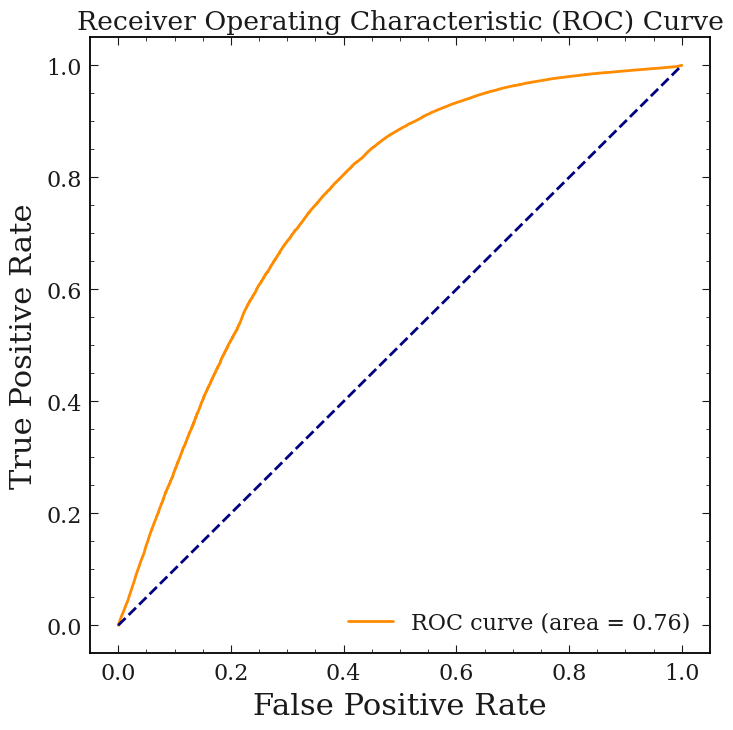

2023-12-19 04:11:56.657838: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-19 04:11:56.665471: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-19 04:11:56.712719: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-19 04:11:56.713038: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-19 04:11:57.360688: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [42]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming 'Pi0_Prob_base', 'Pi0_Prob_50MeV', 'Pi0_Prob_75MeV' are the features
#features = ['Pi0_Prob_base', 'Pi0_Prob_50MeV', 'Pi0_Prob_75MeV', 'Max_base_50MeV', 'Max_base_75MeV', 'Max_base_50MeV_75MeV']
features = ['Pi0_Prob_base', 'Pi0_Prob_50MeV', 'Pi0_Prob_75MeV']
# features += [
#     'Dstarp_chiProb',
#     'ROE_Mgg',
#     # 'soft_cosHelicityAngleMomentum',
#     # 'soft_clusterZernikeMVA',
#     # 'soft_minC2TDist',
#     # 'veto_Easym',
#     'asym_chiProb',
#     'ROE_Mgg_75MeV',
#     #'dM_pi0_75MeV',
#     # 'soft_cosHelicityAngleMomentum_75MeV',
#     # 'soft_clusterZernikeMVA_75MeV',
#     #'soft_clusterE9E21_75MeV',
#     # 'soft_clusterSecondMoment_75MeV',
#     # 'soft_clusterLAT_75MeV',
#     # 'soft_minC2TDist_75MeV',
#     # 'soft_clusterNHits_75MeV',
#     # 'veto_Easym_75MeV',
#     'asym_chiProb_75MeV',
#     #'ROE_Dstar_chiProb_75MeV',
#     'ROE_Mgg_50MeV',
#     #'dM_pi0_75MeV',
#     # 'soft_cosHelicityAngleMomentum_50MeV',
#     # 'soft_clusterZernikeMVA_50MeV',
#     # 'soft_clusterE9E21_50MeV',
#     # 'soft_clusterSecondMoment_50MeV',
#     #'soft_clusterLAT_50MeV',
#     # 'soft_minC2TDist_50MeV',
#     # 'soft_clusterNHits_50MeV',
#     #'veto_Easym_50MeV',
#     'asym_chiProb_50MeV',
# ]
# Combine the signal and background dataframes
pd_df_signal['label'] = 1  # Add a label column for signal
Pi0_selected_pd_df_bkg['label'] = 0  # Add a label column for background
combined_df = pd.concat([pd_df_signal, Pi0_selected_pd_df_bkg], ignore_index=True)

# Fill NaN values with 0.5 in the selected columns
combined_df[features] = combined_df[features].fillna(0.5)
# combined_df = combined_df.dropna(subset=features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    combined_df[features], combined_df['label'], test_size=0.2, random_state=42
)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(len(features),)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


# Compile the model
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
# optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.1)
# optimizer = tf.keras.optimizers.Adadelta(learning_rate=1.0, rho=0.95)
# optimizer = tf.keras.optimizers.Nadam(learning_rate=0.002, beta_1=0.9, beta_2=0.999)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=3, batch_size=32, validation_split=0.1)

# Predict probabilities on the test set
y_score = model.predict(X_test).flatten()

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


/home/jykim/anaconda3/envs/draw/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


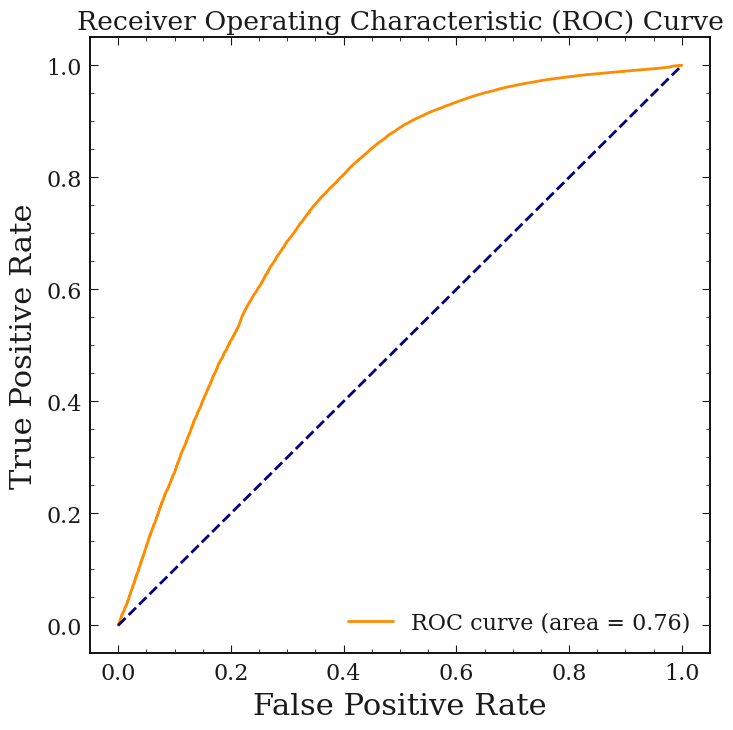

In [43]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming 'Pi0_Prob_base', 'Pi0_Prob_50MeV', 'Pi0_Prob_75MeV' are the features
features = ['Pi0_Prob_base', 'Pi0_Prob_50MeV', 'Pi0_Prob_75MeV']

# Combine the signal and background dataframes
pd_df_signal['label'] = 1  # Add a label column for signal
Pi0_selected_pd_df_bkg['label'] = 0  # Add a label column for background
combined_df = pd.concat([pd_df_signal, Pi0_selected_pd_df_bkg], ignore_index=True)

# Fill NaN values with 0.5 in the selected columns
combined_df[features] = combined_df[features].fillna(0.5)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    combined_df[features], combined_df['label'], test_size=0.2, random_state=42
)

# Initialize the neural network classifier
#clf = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=10, random_state=42)
clf = MLPClassifier(hidden_layer_sizes=(12, 12), batch_size=32, max_iter=10, random_state=42)

# Train the neural network
clf.fit(X_train, y_train)

# Predict probabilities on the test set
y_score = clf.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [44]:
# Assuming you have already trained the classifier and obtained predictions
# clf = MLPClassifier(hidden_layer_sizes=(12, 12), batch_size=32, max_iter=10, random_state=42)
# combined_df is the combined DataFrame of signal and background

# Predict probabilities on the combined set
combined_df['MVA_Output'] = clf.predict_proba(combined_df[features])[:, 1]

# Now, you can split the data back into signal and background
pd_df_signal = combined_df[combined_df['label'] == 1]
Pi0_selected_pd_df_bkg = combined_df[combined_df['label'] == 0]

# Display the DataFrames with the new 'MVA_Output' column
print(pd_df_signal.head())
print(Pi0_selected_pd_df_bkg.head())


   Pi0_Prob_base  Pi0_Prob_50MeV  Pi0_Prob_75MeV  Pi0_Prob_mask      D0_M  \
0       0.500000    1.678583e-07    1.678583e-07            NaN  1.846310   
1       0.112371    1.123708e-01    1.123708e-01       0.000538  1.855166   
2       0.018166    1.816626e-02    1.816626e-02       0.018166  1.869344   
3       0.993236    9.932362e-01    9.932362e-01       0.953257  1.873220   
4       0.017165    2.052669e-04    2.052669e-04       0.000205  1.857805   

   Max_base_50MeV  Max_base_75MeV  Max_base_50MeV_75MeV  label  MVA_Output  
0    1.678583e-07    1.678583e-07          1.678583e-07      1    0.925409  
1    1.123708e-01    1.123708e-01          1.123708e-01      1    0.938641  
2    1.816626e-02    1.816626e-02          1.816626e-02      1    0.942898  
3    9.932362e-01    9.932362e-01          9.932362e-01      1    0.510751  
4    1.716512e-02    1.716512e-02          1.716512e-02      1    0.942967  
         Pi0_Prob_base  Pi0_Prob_50MeV  Pi0_Prob_75MeV  Pi0_Prob_mask  \
10

In [45]:
cut_var = 'MVA_Output'    
df_NN_Max_base_50MeV_75MeV = df_fbdt_eff_rej_sig_1(df_signal=pd_df_signal,df_bkg=Pi0_selected_pd_df_bkg,cut_var=cut_var, step=0.001)

{'sig_eff': [], 'bkg_rej': []}


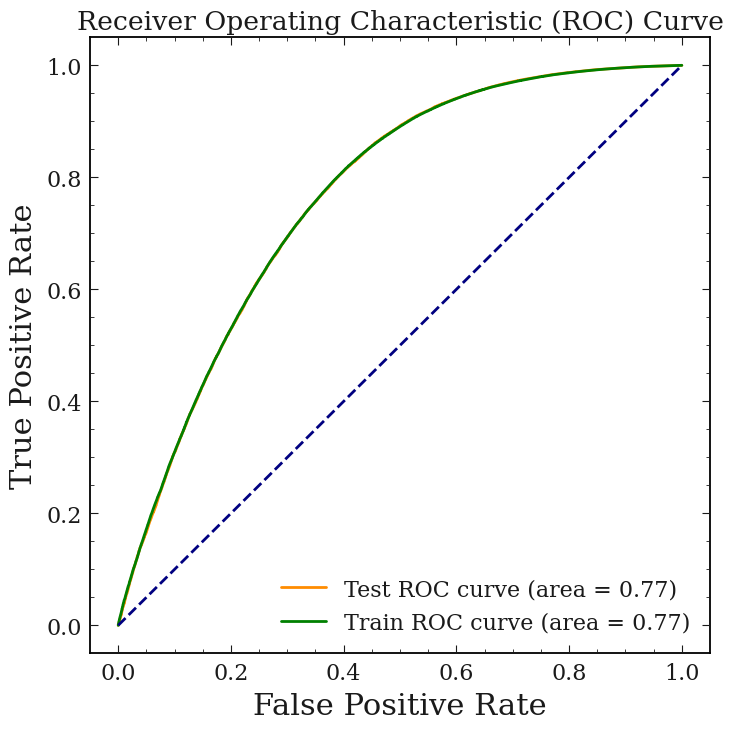

In [265]:
import pandas as pd
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming 'ROE_Mgg', 'ROE_Mgg_50MeV', 'ROE_Mgg_75MeV' are the features
features = ['Pi0_Prob_base', 'Pi0_Prob_50MeV', 'Pi0_Prob_75MeV']
features += [
    # 'Dstarp_chiProb',
    'ROE_Dstar_chiProb',
    'ROE_Dstar_chiProb_50MeV',
    'ROE_Dstar_chiProb_75MeV',
    'soft_cosHelicityAngleMomentum',
    'soft_cosHelicityAngleMomentum_75MeV',
    'soft_cosHelicityAngleMomentum_50MeV',
]
# Combine the signal and background dataframes
pd_df_signal['label'] = 1  # Add a label column for signal
Pi0_selected_pd_df_bkg['label'] = 0  # Add a label column for background
combined_df = pd.concat([pd_df_signal, Pi0_selected_pd_df_bkg], ignore_index=True)

# Fill NaN values with 0.5 in the selected columns
# combined_df[features] = combined_df[features].fillna(0.5)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    combined_df[features], combined_df['label'], test_size=0.2, random_state=42
)

# Initialize the Histogram-based Gradient Boosting Classifier
clf = HistGradientBoostingClassifier(max_iter=200, learning_rate=0.05, max_depth=3, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Predict probabilities on the test set
y_test_score = clf.predict_proba(X_test)[:, 1]

# Predict probabilities on the training set
y_train_score = clf.predict_proba(X_train)[:, 1]

# Calculate ROC curves
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_score)
roc_auc_test = auc(fpr_test, tpr_test)

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_score)
roc_auc_train = auc(fpr_train, tpr_train)

# Plot the ROC curves
plt.figure(figsize=(8, 8))
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='Test ROC curve (area = {:.2f})'.format(roc_auc_test))
plt.plot(fpr_train, tpr_train, color='green', lw=2, label='Train ROC curve (area = {:.2f})'.format(roc_auc_train))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



In [266]:
# Predict probabilities on the combined set
combined_df['MVA_Output'] = clf.predict_proba(combined_df[features])[:, 1]

# Now, you can split the data back into signal and background
pd_df_signal = combined_df[combined_df['label'] == 1]
Pi0_selected_pd_df_bkg = combined_df[combined_df['label'] == 0]

# Display the DataFrames with the new 'MVA_Output' column
print(pd_df_signal.head())
print(Pi0_selected_pd_df_bkg.head())

   Pi0_Prob_base  Pi0_Prob_50MeV  Pi0_Prob_75MeV  Pi0_Prob_mask      D0_M  \
0            NaN    1.678583e-07    1.678583e-07            NaN  1.846310   
1       0.112371    1.123708e-01    1.123708e-01       0.000538  1.855166   
2       0.018166    1.816626e-02    1.816626e-02       0.018166  1.869344   
3       0.993236    9.932362e-01    9.932362e-01       0.953257  1.873220   
4       0.017165    2.052669e-04    2.052669e-04       0.000205  1.857805   

   Dstarp_chiProb   ROE_Mgg  soft_cosHelicityAngleMomentum  \
0        0.182868       NaN                            NaN   
1        0.605559  0.212566                      -0.856072   
2        0.949812  0.228054                      -0.888376   
3        0.503305  0.135299                      -0.846602   
4        0.079746  0.241418                      -0.960332   

   soft_clusterZernikeMVA  soft_minC2TDist  ...  soft_clusterNHits_50MeV  \
0                     NaN              NaN  ...                 6.640625   
1           

In [267]:
ut_var = 'MVA_Output'    
df_max_many_vars = df_fbdt_eff_rej_sig_1(df_signal=pd_df_signal,df_bkg=Pi0_selected_pd_df_bkg,cut_var=cut_var, step=0.001)

{'sig_eff': [], 'bkg_rej': []}


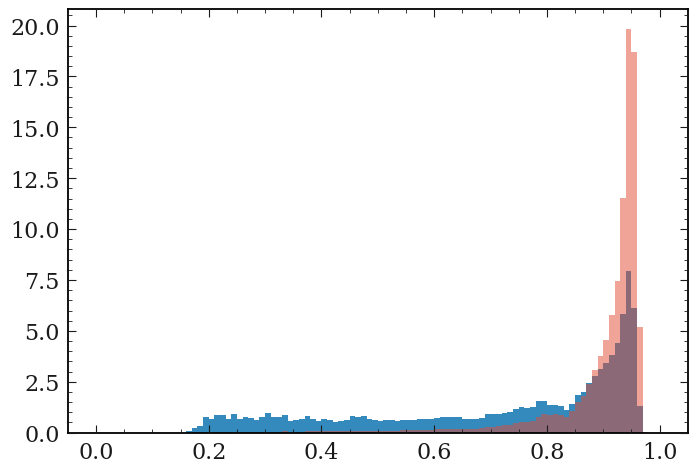

In [276]:
plt.hist(Pi0_selected_pd_df_bkg.MVA_Output, bins=np.linspace(0,1,101),density=True);
plt.hist(pd_df_signal.MVA_Output, bins=np.linspace(0,1,101),density=True,alpha=0.5);

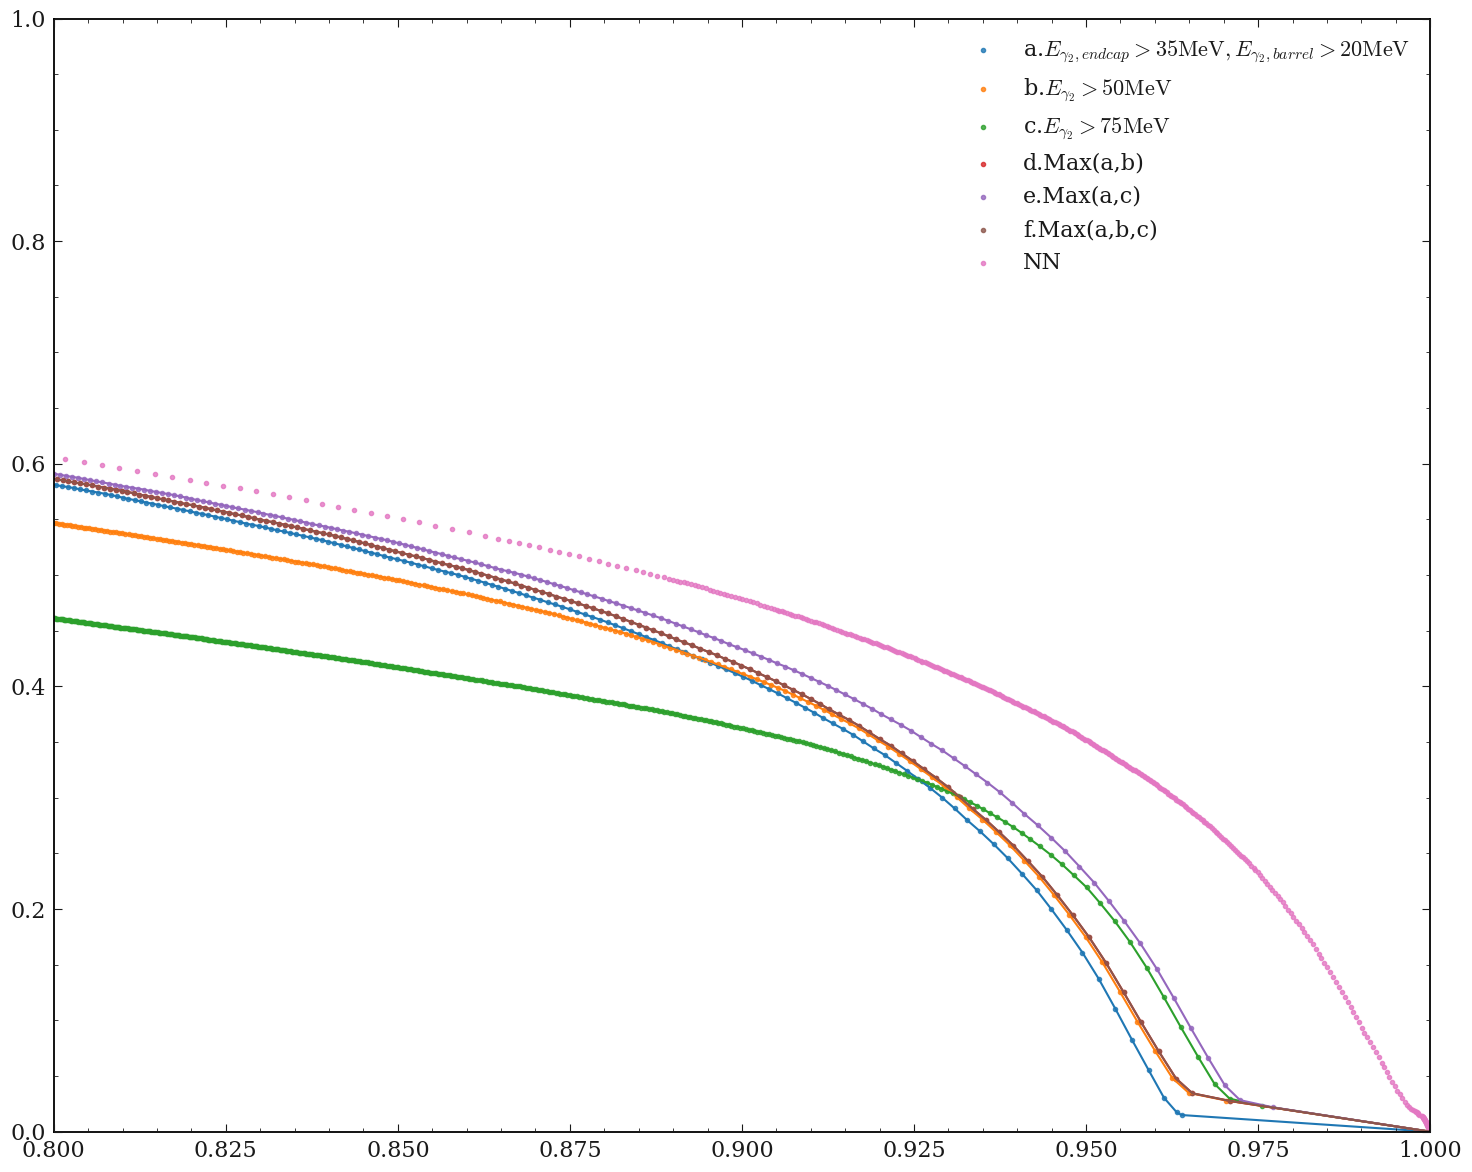

In [50]:
# mycolormap = sns.cubehelix_palette(6, start=1.5, rot=1.5, dark=0.3, light=.8, reverse=True)
mycolormap = sns.color_palette("tab10")
plt.figure(figsize=(15, 12))

plt.scatter(df_base.sig_eff, df_base.bkg_rej , alpha=0.8, marker='.',color=mycolormap[0],label=r'a.$E_{\gamma_2,endcap}>35\mathrm{MeV},E_{\gamma_2,barrel}>20\mathrm{MeV}$')
plt.scatter(df_fbdt_50MeV.sig_eff, df_fbdt_50MeV.bkg_rej, alpha=0.8, marker='.',color=mycolormap[1],label=r'b.$E_{\gamma_2}>50\mathrm{MeV}$')
plt.scatter(df_fbdt_75MeV.sig_eff, df_fbdt_75MeV.bkg_rej, alpha=0.8, marker='.',color=mycolormap[2],label=r'c.$E_{\gamma_2}>75\mathrm{MeV}$')
plt.scatter(df_Max_base_50MeV.sig_eff, df_Max_base_50MeV.bkg_rej, alpha=0.8, marker='.',color=mycolormap[3],label=r'd.Max(a,b)')
plt.scatter(df_Max_base_75MeV.sig_eff, df_Max_base_75MeV.bkg_rej, alpha=0.8, marker='.',color=mycolormap[4],label=r'e.Max(a,c)')
plt.scatter(df_Max_base_50MeV_75MeV.sig_eff, df_Max_base_50MeV_75MeV.bkg_rej, alpha=0.8, marker='.',color=mycolormap[5],label=r'f.Max(a,b,c)')
plt.scatter(df_NN_Max_base_50MeV_75MeV.sig_eff, df_NN_Max_base_50MeV_75MeV.bkg_rej, alpha=0.8, marker='.',color=mycolormap[6],label=r'NN')


plt.plot(df_base.sig_eff, df_base.bkg_rej,color=mycolormap[0])
plt.plot(df_fbdt_50MeV.sig_eff, df_fbdt_50MeV.bkg_rej,color=mycolormap[1])
plt.plot(df_fbdt_75MeV.sig_eff, df_fbdt_75MeV.bkg_rej,color=mycolormap[2])
plt.plot(df_Max_base_50MeV.sig_eff, df_Max_base_50MeV.bkg_rej,color=mycolormap[3])
plt.plot(df_Max_base_75MeV.sig_eff, df_Max_base_75MeV.bkg_rej,color=mycolormap[4])
plt.plot(df_Max_base_50MeV_75MeV.sig_eff, df_Max_base_50MeV_75MeV.bkg_rej,color=mycolormap[5])


ax = plt.gca()
ax.set_xlim(0.8,1) 
# ax.set_xlim(0,1)   
ax.set_ylim(0.,1)

plt.legend()
plt.tight_layout()

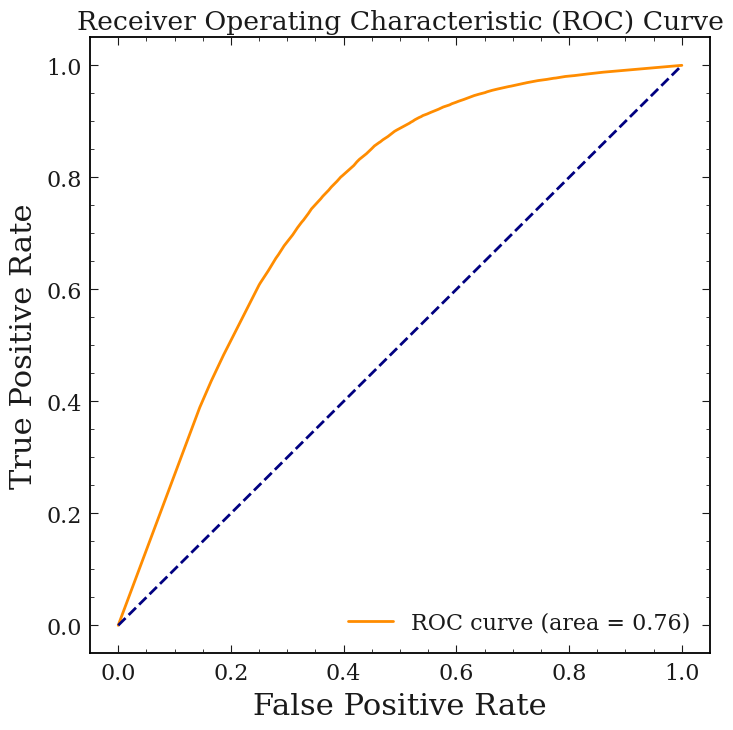

In [99]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming 'Pi0_Prob_base', 'Pi0_Prob_50MeV', 'Pi0_Prob_75MeV' are the features
features = ['Pi0_Prob_base', 'Pi0_Prob_50MeV', 'Pi0_Prob_75MeV']

# Combine the signal and background dataframes
pd_df_signal['label'] = 1  # Add a label column for signal
Pi0_selected_pd_df_bkg['label'] = 0  # Add a label column for background
combined_df = pd.concat([pd_df_signal, Pi0_selected_pd_df_bkg], ignore_index=True)

# Fill NaN values with 0.5 in the selected columns
combined_df[features] = combined_df[features].fillna(0.5)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    combined_df[features], combined_df['label'], test_size=0.2, random_state=42
)

# Initialize the Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.05, max_depth=3, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Predict probabilities on the test set
y_score = clf.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## massveto

In [23]:
base_file = '/home/belle2/jaeyoung/storage_ghi/Ntuples_ghi/D2phipi0/'

file_list=str()
file_list = base_file + 'preext_Vg_roeVpi0_231123pi0_D2phipi0_mdst_100000_*.root'
# file_list = list()
# for i in ['ccbar/recon_*.root','uubar/recon_*.root','ddbar/recon_*.root','ssbar/recon_*.root', 'charged/recon_*.root', 'mixed/recon_*.root', 'taupair/recon_*.root',]:
#     number = format(i, '02')
#     file_name = base_file + i 
#     file_list.append(file_name)
# print(file_list)

In [24]:
# tree='antiKstar'
tree='phi'

# base_filter='D0_M>1.67 & D0_M<2.06'
# base_filter='D0_M>0'
# base_filter='D0_M>1.8 & D0_M<1.9'
# base_filter='D0_M>1.67 & D0_M<2.06'


variables = ['ROE_Mgg','ROE_Mgg_50MeV','ROE_Mgg_75MeV','D0_M']
variables += [
    # 'Dstarp_chiProb',
    'ROE_Dstar_chiProb',
    'ROE_Dstar_chiProb_50MeV',
    'ROE_Dstar_chiProb_75MeV',
    'soft_cosHelicityAngleMomentum',
    'soft_cosHelicityAngleMomentum_75MeV',
    'soft_cosHelicityAngleMomentum_50MeV',
]

In [25]:
# massveto_pd_all = get_pd_file_list(file_list=file_list, tree=tree, base_filter=base_filter, variables=variables)
massveto_pd_all = get_pd(file=file_list, tree=tree, base_filter=base_filter, variables=variables)

# massveto_pd_all['Max_base_50MeV'] = massveto_pd_all[['Pi0_Prob_base', 'Pi0_Prob_50MeV']].max(axis=1)
# massveto_pd_all['Max_base_75MeV'] = massveto_pd_all[['Pi0_Prob_base', 'Pi0_Prob_75MeV']].max(axis=1)
# massveto_pd_all['Max_base_50MeV_75MeV'] = massveto_pd_all[['Pi0_Prob_base', 'Pi0_Prob_50MeV','Pi0_Prob_75MeV']].max(axis=1)

In [26]:
# Pi0_bkg_cuts = 'gamma_genMotherPDG==111'
Pi0_bkg_cuts = 'D0_M>0'

# Pi0_bkg_cuts += ' & abs(Dstarp_Q-0.00593)<0.0006 & abs(antiKstar_M - 0.89555)< 0.06 & Dstarp_CMS_p>2.4'
Pi0_selected_pd_df_bkg = massveto_pd_all.query(Pi0_bkg_cuts)

In [27]:
# file = '/media/jykim/T7/storage/01_recon/antiKstar/D0_massveto_v2_half_1_pre_signalMC_recon_mdst_antiKstar_*.root'
# file = '/media/jykim/T7/storage/01_recon/antiKstar/D0_massveto_v2_half_1_sig_ext_signalMC_recon_mdst_antiKstar_*.root'
# file = '/media/jykim/T7/storage/01_recon/rho/D0_massveto_v2_half_1_pre_signalMC_recon_mdst_rho_*.root'
# file = '/media/jykim/T7/storage/01_recon/rho/D0_massveto_v2_half_1_sig_ext_signalMC_recon_mdst_rho_*.root'


file = '/home/belle2/jaeyoung/storage_ghi/Ntuples_ghi/D2phigamma/preext_Vg_roeVpi0_231123pi0_D2phigamma_mdst_100000_*.root'
# base_filter='Dstarp_isSignal==1'
# base_filter+=' & D0_M>1.8 & D0_M<1.9'
# base_filter+='& D0_M>1.67 & D0_M<2.06'

pd_df_signal = get_pd(file=file, tree=tree,variables=variables ,base_filter=sig_base_filter)

# pd_df_signal['Max_base_50MeV'] = pd_df_signal[['Pi0_Prob_base', 'Pi0_Prob_50MeV']].max(axis=1)
# pd_df_signal['Max_base_75MeV'] = pd_df_signal[['Pi0_Prob_base', 'Pi0_Prob_75MeV']].max(axis=1)

# pd_df_signal['Max_base_50MeV_75MeV'] = pd_df_signal[['Pi0_Prob_base', 'Pi0_Prob_50MeV','Pi0_Prob_75MeV']].max(axis=1)

In [28]:
def df_massveto_eff_rej(df_signal, df_bkg,mass_var='cut_variable', step = 0.0005):
    
    pd_df_signal = df_signal
    Pi0_selected_pd_df_bkg = df_bkg
    nominal_pi0_mass = 0.13498
    sig_Total_row_num = pd_df_signal.shape[0]
    Pi0_bkg_Total_row_num = Pi0_selected_pd_df_bkg.shape[0]
    width_mass = 0.0

    data_dict = dict.fromkeys(['sig_eff', 'bkg_rej'])
    data_dict['sig_eff']=list()
    data_dict['bkg_rej']=list()
    print(data_dict)
    # sig_eff_list = list()
    # bkg_rej_list = list()
    sig_Reduced_row_num = pd_df_signal.shape[0]
    data_dict['sig_eff'].append(eff(sig_Total_row_num, sig_Reduced_row_num ))
    Pi0_bkg_Reduced_row_num = Pi0_selected_pd_df_bkg.shape[0]
    data_dict['bkg_rej'].append(Bkg_rej(Pi0_bkg_Total_row_num, Pi0_bkg_Reduced_row_num)) 
    for i in range(1,100):     
        if width_mass < 0.025:
            width_mass     = 0 + i * step
            min_mass_bound = nominal_pi0_mass - width_mass  
            max_mass_bound = nominal_pi0_mass + width_mass
            #print(width_mass)
            sig_Reduced_row_num = pd_df_signal[(pd_df_signal[mass_var]<min_mass_bound) | (pd_df_signal[mass_var]>max_mass_bound)].shape[0]
            data_dict['sig_eff'].append(eff(sig_Total_row_num, sig_Reduced_row_num ))
            #sig_eff_list.append(eff(sig_Total_row_num, sig_Reduced_row_num ))

            Pi0_bkg_Reduced_row_num = Pi0_selected_pd_df_bkg[(Pi0_selected_pd_df_bkg[mass_var]<min_mass_bound) | (Pi0_selected_pd_df_bkg[mass_var]>max_mass_bound)].shape[0]
            data_dict['bkg_rej'].append(Bkg_rej(Pi0_bkg_Total_row_num, Pi0_bkg_Reduced_row_num))

            #bkg_rej_list.append(Bkg_rej(Pi0_bkg_Total_row_num, Pi0_bkg_Reduced_row_num))      
    df_base = pd.DataFrame(data_dict)
    
    return df_base

In [29]:
# nominal_pi0_mass = 0.13498
# nominal_eta_mass = 0.54786
#nominal_pi0_mass = 0.13498


In [30]:
mass_var = 'ROE_Mgg'
df_massveto_base = df_massveto_eff_rej(df_signal=pd_df_signal,df_bkg=Pi0_selected_pd_df_bkg,mass_var=mass_var, step=0.0005)

{'sig_eff': [], 'bkg_rej': []}


In [31]:
mass_var = 'ROE_Mgg_50MeV'
df_massveto_50MeV = df_massveto_eff_rej(df_signal=pd_df_signal,df_bkg=Pi0_selected_pd_df_bkg,mass_var=mass_var, step=0.0005)

{'sig_eff': [], 'bkg_rej': []}


In [32]:
mass_var = 'ROE_Mgg_75MeV'
df_massveto_75MeV = df_massveto_eff_rej(df_signal=pd_df_signal,df_bkg=Pi0_selected_pd_df_bkg,mass_var=mass_var, step=0.0005)

{'sig_eff': [], 'bkg_rej': []}


In [33]:
df_massveto_50MeV.describe()

sig_eff    bkg_rej
count  51.000000  51.000000
mean    0.919421   0.362398
std     0.045337   0.147777
min     0.846089   0.000000
25%     0.880998   0.276810
50%     0.917679   0.415634
75%     0.956824   0.480243
max     1.000000   0.519705

In [34]:
df_massveto_75MeV.describe()

sig_eff    bkg_rej
count  51.000000  51.000000
mean    0.945582   0.267741
std     0.030123   0.107811
min     0.896381   0.000000
25%     0.920095   0.206966
50%     0.944690   0.307202
75%     0.970394   0.352729
max     1.000000   0.381774

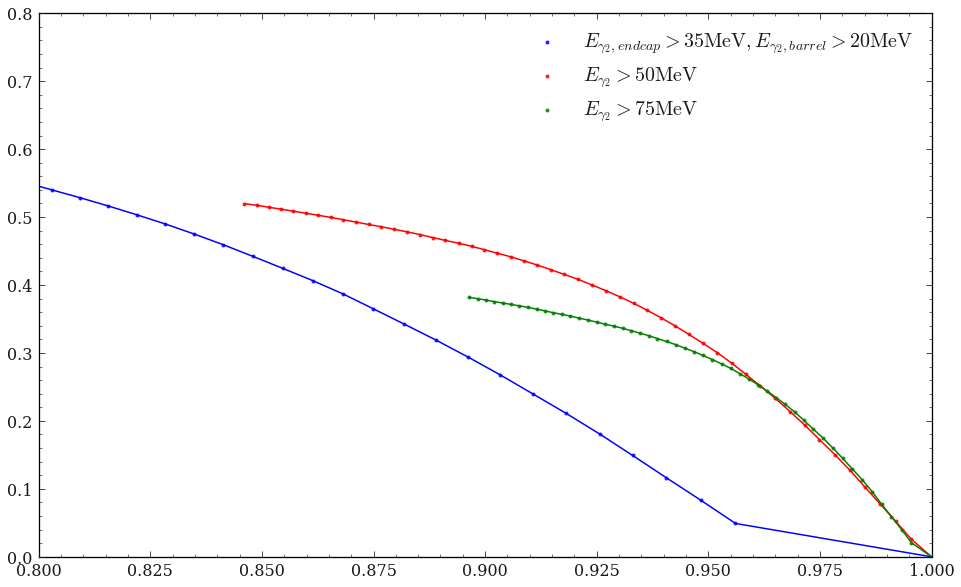

In [39]:
plt.figure(figsize=(16, 10))

plt.scatter(df_massveto_base.sig_eff, df_massveto_base.bkg_rej , alpha=0.8, marker='.',c='blue',label=r'$E_{\gamma_2,endcap}>35\mathrm{MeV},E_{\gamma_2,barrel}>20\mathrm{MeV}$')
plt.scatter(df_massveto_50MeV.sig_eff, df_massveto_50MeV.bkg_rej , alpha=0.8, marker='.',c='red',label=r'$E_{\gamma_2}>50\mathrm{MeV}$')
plt.scatter(df_massveto_75MeV.sig_eff, df_massveto_75MeV.bkg_rej, alpha=0.8, marker='.',c='green',label=r'$E_{\gamma_2}>75\mathrm{MeV}$')

plt.plot(df_massveto_base.sig_eff.values, df_massveto_base.bkg_rej.values,c='blue')
plt.plot(df_massveto_50MeV.sig_eff.values, df_massveto_50MeV.bkg_rej.values,c='red')
plt.plot(df_massveto_75MeV.sig_eff.values, df_massveto_75MeV.bkg_rej.values,c='green')

plt.legend()
ax = plt.gca()
ax.set_xlim(0.8,1) 
# ax.set_xlim(0,1)   

ax.set_ylim(0,0.8)
legend = plt.legend(fontsize=20)
plt.savefig("/home/belle2/jaeyoung/plots/2024_Jan_B2GM/20240129_massveto_sigregion_ROC.png")

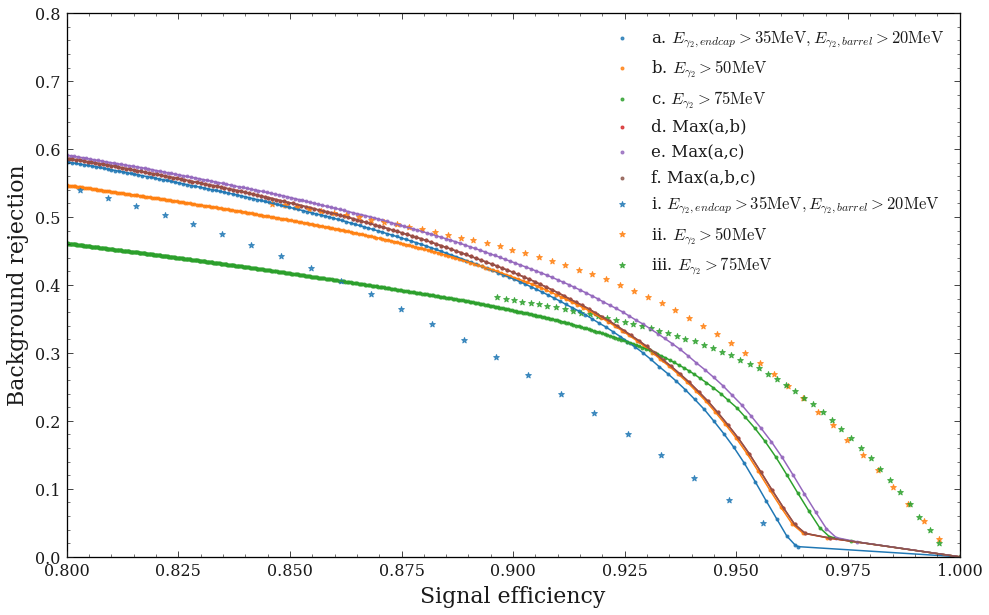

In [65]:
plt.figure(figsize=(16, 10))

plt.scatter(df_base.sig_eff, df_base.bkg_rej , alpha=0.8, marker='.',color=mycolormap[0],label=r'a. $E_{\gamma_2,endcap}>35\mathrm{MeV},E_{\gamma_2,barrel}>20\mathrm{MeV}$')
plt.scatter(df_fbdt_50MeV.sig_eff, df_fbdt_50MeV.bkg_rej, alpha=0.8, marker='.',color=mycolormap[1],label=r'b. $E_{\gamma_2}>50\mathrm{MeV}$')
plt.scatter(df_fbdt_75MeV.sig_eff, df_fbdt_75MeV.bkg_rej, alpha=0.8, marker='.',color=mycolormap[2],label=r'c. $E_{\gamma_2}>75\mathrm{MeV}$')
plt.scatter(df_Max_base_50MeV.sig_eff, df_Max_base_50MeV.bkg_rej, alpha=0.8, marker='.',color=mycolormap[3],label=r'd. Max(a,b)')
plt.scatter(df_Max_base_75MeV.sig_eff, df_Max_base_75MeV.bkg_rej, alpha=0.8, marker='.',color=mycolormap[4],label=r'e. Max(a,c)')
plt.scatter(df_Max_base_50MeV_75MeV.sig_eff, df_Max_base_50MeV_75MeV.bkg_rej, alpha=0.8, marker='.',color=mycolormap[5],label=r'f. Max(a,b,c)')


plt.plot(df_base.sig_eff.values, df_base.bkg_rej.values,color=mycolormap[0])
plt.plot(df_fbdt_50MeV.sig_eff.values, df_fbdt_50MeV.bkg_rej.values,color=mycolormap[1])
plt.plot(df_fbdt_75MeV.sig_eff.values, df_fbdt_75MeV.bkg_rej.values,color=mycolormap[2])
plt.plot(df_Max_base_50MeV.sig_eff.values, df_Max_base_50MeV.bkg_rej.values,color=mycolormap[3])
plt.plot(df_Max_base_75MeV.sig_eff.values, df_Max_base_75MeV.bkg_rej.values,color=mycolormap[4])
plt.plot(df_Max_base_50MeV_75MeV.sig_eff.values, df_Max_base_50MeV_75MeV.bkg_rej.values,color=mycolormap[5])

plt.scatter(df_massveto_base.sig_eff.values, df_massveto_base.bkg_rej.values , alpha=0.8, marker='*',color=mycolormap[0],label=r'i. $E_{\gamma_2,endcap}>35\mathrm{MeV},E_{\gamma_2,barrel}>20\mathrm{MeV}$')
plt.scatter(df_massveto_50MeV.sig_eff.values, df_massveto_50MeV.bkg_rej.values , alpha=0.8, marker='*',color=mycolormap[1],label=r'ii. $E_{\gamma_2}>50\mathrm{MeV}$')
plt.scatter(df_massveto_75MeV.sig_eff.values, df_massveto_75MeV.bkg_rej.values, alpha=0.8, marker='*',color=mycolormap[2],label=r'iii. $E_{\gamma_2}>75\mathrm{MeV}$')

# plt.scatter(0.91,0.6)

ax = plt.gca()
ax.set_xlim(0.8,1) 
# ax.set_xlim(0,1)   
ax.set_ylim(0.,0.8)

ax.set_xlabel('Signal efficiency')
ax.set_ylabel('Background rejection')
# plt.legend()
# plt.tight_layout()
legend = plt.legend(fontsize=16.5)

plt.savefig("/home/belle2/jaeyoung/plots/2024_Jan_B2GM/20240129_massveto_maxBDT_sigregion_ROC.png")

### massveto 변수 NN


In [283]:
# Check for NaN values in pd_df_signal
nan_values_signal = pd_df_signal.isnull().sum()
print("NaN values in pd_df_signal:")
print(nan_values_signal)

# Check for NaN values in Pi0_selected_pd_df_bkg
nan_values_bkg = Pi0_selected_pd_df_bkg.isnull().sum()
print("\nNaN values in Pi0_selected_pd_df_bkg:")
print(nan_values_bkg)

NaN values in pd_df_signal:
ROE_Mgg                                37040
ROE_Mgg_50MeV                            971
ROE_Mgg_75MeV                           2263
D0_M                                       0
ROE_Dstar_chiProb                      37040
ROE_Dstar_chiProb_50MeV                  971
ROE_Dstar_chiProb_75MeV                 2263
soft_cosHelicityAngleMomentum          37040
soft_cosHelicityAngleMomentum_75MeV     2263
soft_cosHelicityAngleMomentum_50MeV      971
dtype: int64

NaN values in Pi0_selected_pd_df_bkg:
ROE_Mgg                                2150
ROE_Mgg_50MeV                            73
ROE_Mgg_75MeV                           220
D0_M                                      0
ROE_Dstar_chiProb                      2150
ROE_Dstar_chiProb_50MeV                  73
ROE_Dstar_chiProb_75MeV                 220
soft_cosHelicityAngleMomentum          2150
soft_cosHelicityAngleMomentum_75MeV     220
soft_cosHelicityAngleMomentum_50MeV      73
dtype: int64


Epoch 1/5
25576/25576 [==============================] - 16s 612us/step - loss: 0.3637 - accuracy: 0.8742 - val_loss: 0.3530 - val_accuracy: 0.8743
Epoch 2/5
25576/25576 [==============================] - 16s 611us/step - loss: 0.3573 - accuracy: 0.8744 - val_loss: 0.3469 - val_accuracy: 0.8743
Epoch 3/5
25576/25576 [==============================] - 16s 609us/step - loss: 0.3552 - accuracy: 0.8744 - val_loss: 0.3501 - val_accuracy: 0.8743
Epoch 4/5
25576/25576 [==============================] - 15s 606us/step - loss: 0.3546 - accuracy: 0.8744 - val_loss: 0.3449 - val_accuracy: 0.8743
Epoch 5/5
7105/7105 [==============================] - 3s 354us/step


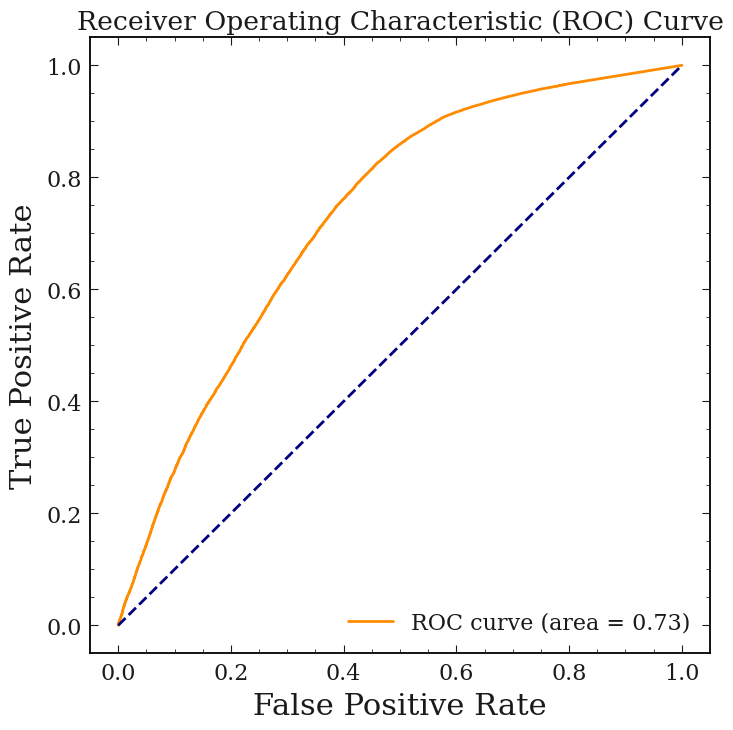

In [32]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

features = ['ROE_Mgg','ROE_Mgg_50MeV','ROE_Mgg_75MeV']

# Combine the signal and background dataframes
pd_df_signal['label'] = 1  # Add a label column for signal
Pi0_selected_pd_df_bkg['label'] = 0  # Add a label column for background
combined_df = pd.concat([pd_df_signal, Pi0_selected_pd_df_bkg], ignore_index=True)

# Fill NaN values with 0.5 in the selected columns
#combined_df[features] = combined_df[features].fillna(0.5)
combined_df = combined_df.dropna(subset=features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    combined_df[features], combined_df['label'], test_size=0.2, random_state=42
)

# # Define a simple neural network using TensorFlow Keras
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(100, activation='relu', input_shape=(len(features),)),
#     tf.keras.layers.Dense(50, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(24, activation='relu', input_shape=(len(features),)),
    tf.keras.layers.Dropout(0.5),  # Adding dropout for regularization
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


# Compile the model
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
# optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
# optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.01)
optimizer = tf.keras.optimizers.Adadelta(learning_rate=1.0, rho=0.95)
# optimizer = tf.keras.optimizers.Nadam(learning_rate=0.002, beta_1=0.9, beta_2=0.999)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# Predict probabilities on the test set
y_score = model.predict(X_test).flatten()

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

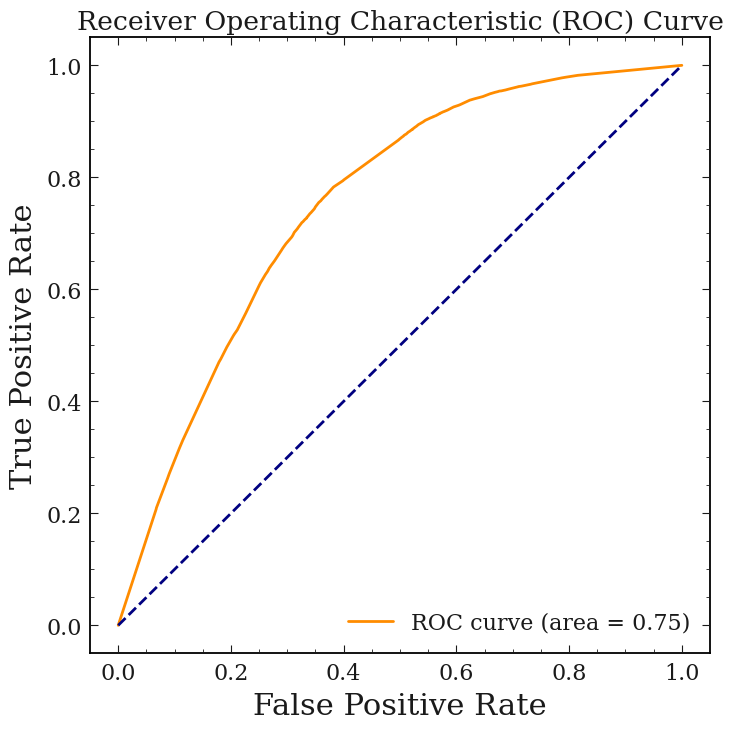

In [284]:
import pandas as pd
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming 'ROE_Mgg', 'ROE_Mgg_50MeV', 'ROE_Mgg_75MeV' are the features
features = ['ROE_Mgg', 'ROE_Mgg_50MeV', 'ROE_Mgg_75MeV']
features += [
    # 'Dstarp_chiProb',
    'ROE_Dstar_chiProb',
    'ROE_Dstar_chiProb_50MeV',
    'ROE_Dstar_chiProb_75MeV',
    'soft_cosHelicityAngleMomentum',
    'soft_cosHelicityAngleMomentum_75MeV',
    'soft_cosHelicityAngleMomentum_50MeV',
]
# Combine the signal and background dataframes
pd_df_signal['label'] = 1  # Add a label column for signal
Pi0_selected_pd_df_bkg['label'] = 0  # Add a label column for background
combined_df = pd.concat([pd_df_signal, Pi0_selected_pd_df_bkg], ignore_index=True)

# Fill NaN values with 0.5 in the selected columns
# combined_df[features] = combined_df[features].fillna(0.5)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    combined_df[features], combined_df['label'], test_size=0.2, random_state=42
)

# Initialize the Histogram-based Gradient Boosting Classifier
clf = HistGradientBoostingClassifier(max_iter=20, learning_rate=0.05, max_depth=3, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Predict probabilities on the test set
y_score = clf.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



In [285]:
# Assuming you have already trained the classifier and obtained predictions
# clf = MLPClassifier(hidden_layer_sizes=(12, 12), batch_size=32, max_iter=10, random_state=42)
# combined_df is the combined DataFrame of signal and background

# Predict probabilities on the combined set
combined_df['MVA_Output'] = clf.predict_proba(combined_df[features])[:, 1]

# Now, you can split the data back into signal and background
pd_df_signal = combined_df[combined_df['label'] == 1]
Pi0_selected_pd_df_bkg = combined_df[combined_df['label'] == 0]

# Display the DataFrames with the new 'MVA_Output' column
print(pd_df_signal.head())
print(Pi0_selected_pd_df_bkg.head())


    ROE_Mgg  ROE_Mgg_50MeV  ROE_Mgg_75MeV      D0_M  ROE_Dstar_chiProb  \
0       NaN       0.489824       0.489824  1.846310                NaN   
1  0.212566       0.212566       0.212566  1.855166       2.258589e-17   
2  0.228054       0.228054       0.228054  1.869344       1.078216e-16   
3  0.135299       0.135299       0.135299  1.873220       5.991648e-01   
4  0.241418       0.420333       0.420333  1.857805       7.480658e-08   

   ROE_Dstar_chiProb_50MeV  ROE_Dstar_chiProb_75MeV  \
0             2.072134e-31             2.072134e-31   
1             2.258589e-17             2.258589e-17   
2             1.078216e-16             1.078216e-16   
3             5.991648e-01             5.991648e-01   
4            8.957946e-221            8.957946e-221   

   soft_cosHelicityAngleMomentum  soft_cosHelicityAngleMomentum_75MeV  \
0                            NaN                            -0.909247   
1                      -0.856072                            -0.856072   
2    

In [286]:
cut_var = 'MVA_Output'    
df_hist_massveto = df_fbdt_eff_rej_sig_1(df_signal=pd_df_signal,df_bkg=Pi0_selected_pd_df_bkg,cut_var=cut_var, step=0.001)

{'sig_eff': [], 'bkg_rej': []}


array([[<AxesSubplot:title={'center':'MVA_Output'}>]], dtype=object)

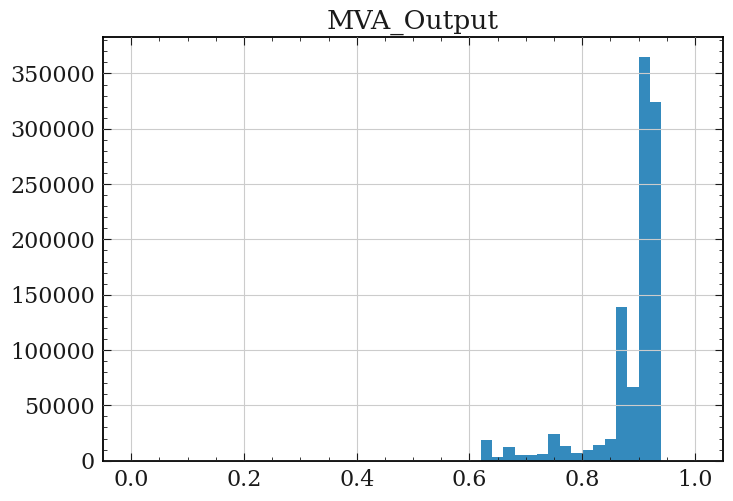

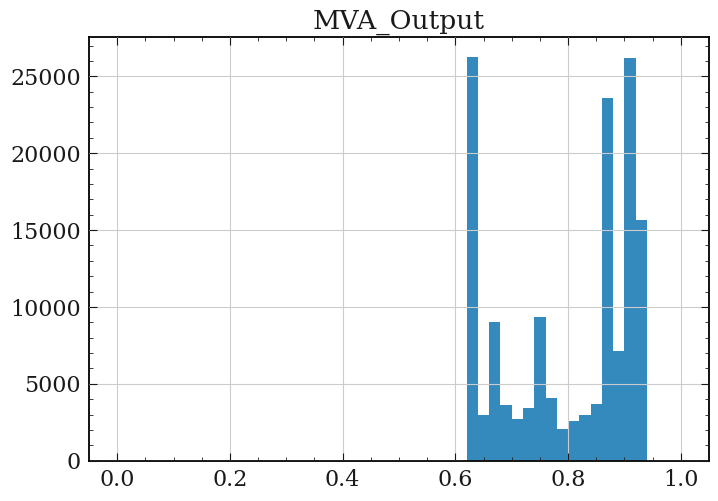

In [287]:
pd_df_signal.hist("MVA_Output",bins=np.linspace(0,1,51))
Pi0_selected_pd_df_bkg.hist("MVA_Output",bins=np.linspace(0,1,51))

### massveto 변수로 FBDT, 

In [32]:
#v14

In [44]:
base_file = '/home/belle2/jaeyoung/storage_ghi/Ntuples_ghi/D2phipi0/'
file_list=str()
file_list = base_file + 'preext_Vg_roeVpi0_231123pi0_FBDT_D2phipi0_mdst_100000_*.root'
tree='phi'

# base_filter='D0_M>1.67 & D0_M<2.06'
# base_filter='D0_M>0'
 
# base_filter='D0_M>1.8 & D0_M<1.9'
# base_filter='D0_M>1.67 & D0_M<2.06'

variables = ['mass_Pi0_Prob','D0_M']

In [45]:
# massveto_pd_all = get_pd_file_list(file_list=file_list, tree=tree, base_filter=base_filter, variables=variables)
massveto_pd_all = get_pd(file=file_list, tree=tree, base_filter=base_filter, variables=variables)
# massveto_pd_all['Max_base_50MeV'] = massveto_pd_all[['Pi0_Prob_base', 'Pi0_Prob_50MeV']].max(axis=1)
# massveto_pd_all['Max_base_75MeV'] = massveto_pd_all[['Pi0_Prob_base', 'Pi0_Prob_75MeV']].max(axis=1)
# massveto_pd_all['Max_base_50MeV_75MeV'] = massveto_pd_all[['Pi0_Prob_base', 'Pi0_Prob_50MeV','Pi0_Prob_75MeV']].max(axis=1)

In [46]:
# Pi0_bkg_cuts = 'gamma_genMotherPDG==111'
Pi0_bkg_cuts = 'D0_M>0'
# Pi0_bkg_cuts += ' & abs(Dstarp_Q-0.00593)<0.0006 & abs(antiKstar_M - 0.89555)< 0.06 & Dstarp_CMS_p>2.4'
Pi0_selected_pd_df_bkg = massveto_pd_all.query(Pi0_bkg_cuts)

(array([0.000e+00, 0.000e+00, 1.510e+02, 2.976e+03, 6.019e+03, 5.982e+03,
        4.609e+03, 3.531e+03, 2.781e+03, 2.227e+03, 1.954e+03, 1.677e+03,
        1.493e+03, 1.508e+03, 1.626e+03, 1.488e+03, 1.668e+03, 1.646e+03,
        1.712e+03, 1.409e+03, 1.427e+03, 1.269e+03, 1.144e+03, 1.121e+03,
        1.114e+03, 1.012e+03, 1.010e+03, 9.810e+02, 9.140e+02, 9.300e+02,
        8.760e+02, 9.060e+02, 8.500e+02, 9.360e+02, 9.260e+02, 9.500e+02,
        9.340e+02, 9.430e+02, 9.360e+02, 9.890e+02, 9.990e+02, 1.107e+03,
        1.108e+03, 1.116e+03, 1.177e+03, 1.313e+03, 1.390e+03, 1.355e+03,
        1.320e+03, 1.364e+03, 1.448e+03, 1.569e+03, 1.651e+03, 1.641e+03,
        1.647e+03, 1.656e+03, 1.644e+03, 1.696e+03, 1.624e+03, 1.701e+03,
        1.718e+03, 1.741e+03, 1.716e+03, 1.662e+03, 1.742e+03, 1.609e+03,
        1.680e+03, 1.738e+03, 1.668e+03, 1.672e+03, 1.655e+03, 1.726e+03,
        1.811e+03, 1.804e+03, 1.869e+03, 1.936e+03, 2.025e+03, 2.030e+03,
        2.319e+03, 2.505e+03, 2.649e+0

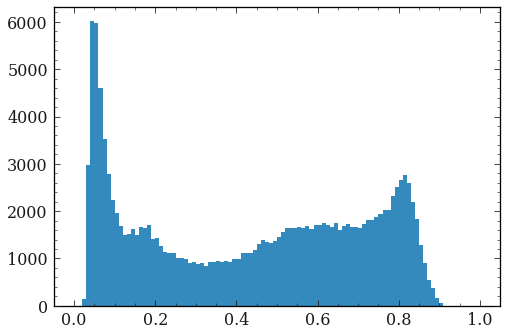

In [47]:
plt.hist(Pi0_selected_pd_df_bkg.mass_Pi0_Prob, bins=np.linspace(0,1,101))

In [48]:
# file = '/media/jykim/T7/storage/01_recon/antiKstar/D0_massveto_v2_half_1_pre_signalMC_recon_mdst_antiKstar_*.root'
# file = '/media/jykim/T7/storage/01_recon/antiKstar/D0_massveto_v2_half_1_sig_ext_signalMC_recon_mdst_antiKstar_*.root'
# file = '/media/jykim/T7/storage/01_recon/rho/D0_massveto_v2_half_1_pre_signalMC_recon_mdst_rho_*.root'
# file = '/media/jykim/T7/storage/01_recon/rho/D0_massveto_v2_half_1_sig_ext_signalMC_recon_mdst_rho_*.root'


file = '/home/belle2/jaeyoung/storage_ghi/Ntuples_ghi/D2phigamma/preext_Vg_roeVpi0_231123pi0_FBDT_D2phigamma_mdst_100000_*.root'
# base_filter='Dstarp_isSignal==1'
# # base_filter+='& D0_M>1.8 & D0_M<1.9'
# base_filter+='& D0_M>1.67 & D0_M<2.06'

pd_df_signal = get_pd(file=file, tree=tree,variables=variables ,base_filter=sig_base_filter)

# pd_df_signal['Max_base_50MeV'] = pd_df_signal[['Pi0_Prob_base', 'Pi0_Prob_50MeV']].max(axis=1)
# pd_df_signal['Max_base_75MeV'] = pd_df_signal[['Pi0_Prob_base', 'Pi0_Prob_75MeV']].max(axis=1)
# 
# pd_df_signal['Max_base_50MeV_75MeV'] = pd_df_signal[['Pi0_Prob_base', 'Pi0_Prob_50MeV','Pi0_Prob_75MeV']].max(axis=1)

In [49]:
cut_var = 'mass_Pi0_Prob'
df_mass_Pi0_Prob = df_fbdt_eff_rej_sig_1(df_signal=pd_df_signal,df_bkg=Pi0_selected_pd_df_bkg,cut_var=cut_var, step=0.001)

{'sig_eff': [], 'bkg_rej': []}


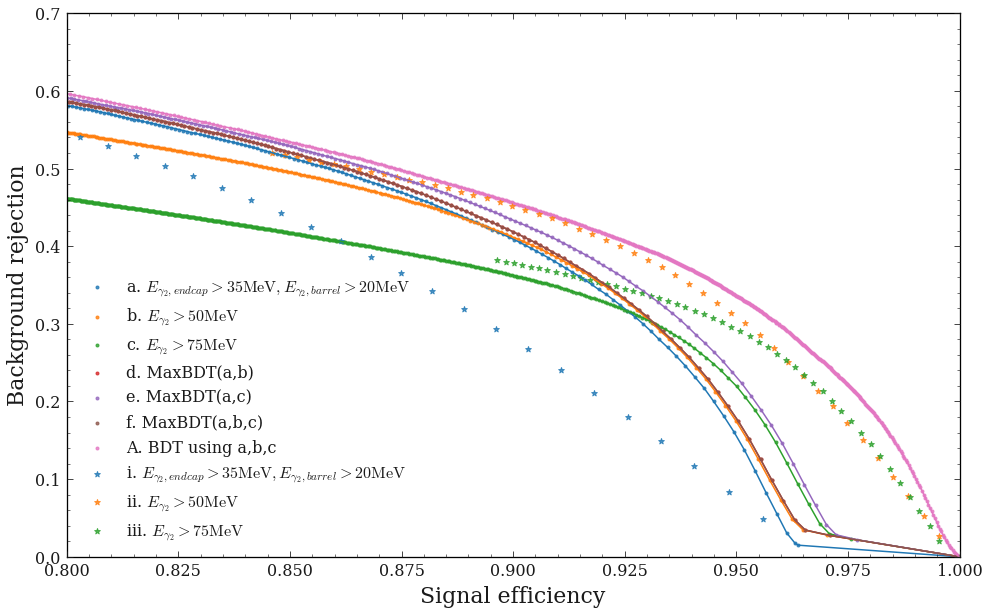

In [51]:
plt.figure(figsize=(16, 10))

plt.scatter(df_base.sig_eff, df_base.bkg_rej , alpha=0.8, marker='.',color=mycolormap[0],label=r'a. $E_{\gamma_2,endcap}>35\mathrm{MeV},E_{\gamma_2,barrel}>20\mathrm{MeV}$')
plt.scatter(df_fbdt_50MeV.sig_eff, df_fbdt_50MeV.bkg_rej, alpha=0.8, marker='.',color=mycolormap[1],label=r'b. $E_{\gamma_2}>50\mathrm{MeV}$')
plt.scatter(df_fbdt_75MeV.sig_eff, df_fbdt_75MeV.bkg_rej, alpha=0.8, marker='.',color=mycolormap[2],label=r'c. $E_{\gamma_2}>75\mathrm{MeV}$')
plt.scatter(df_Max_base_50MeV.sig_eff, df_Max_base_50MeV.bkg_rej, alpha=0.8, marker='.',color=mycolormap[3],label=r'd. MaxBDT(a,b)')
plt.scatter(df_Max_base_75MeV.sig_eff, df_Max_base_75MeV.bkg_rej, alpha=0.8, marker='.',color=mycolormap[4],label=r'e. MaxBDT(a,c)')
plt.scatter(df_Max_base_50MeV_75MeV.sig_eff, df_Max_base_50MeV_75MeV.bkg_rej, alpha=0.8, marker='.',color=mycolormap[5],label=r'f. MaxBDT(a,b,c)')
plt.scatter(df_mass_Pi0_Prob.sig_eff, df_mass_Pi0_Prob.bkg_rej, alpha=0.8, marker='.',color=mycolormap[6],label=r'A. BDT using a,b,c')


plt.plot(df_base.sig_eff.values, df_base.bkg_rej.values,color=mycolormap[0])
plt.plot(df_fbdt_50MeV.sig_eff.values, df_fbdt_50MeV.bkg_rej.values,color=mycolormap[1])
plt.plot(df_fbdt_75MeV.sig_eff.values, df_fbdt_75MeV.bkg_rej.values,color=mycolormap[2])
plt.plot(df_Max_base_50MeV.sig_eff.values, df_Max_base_50MeV.bkg_rej.values,color=mycolormap[3])
plt.plot(df_Max_base_75MeV.sig_eff.values, df_Max_base_75MeV.bkg_rej.values,color=mycolormap[4])
plt.plot(df_Max_base_50MeV_75MeV.sig_eff.values, df_Max_base_50MeV_75MeV.bkg_rej.values,color=mycolormap[5])
plt.plot(df_mass_Pi0_Prob.sig_eff.values, df_mass_Pi0_Prob.bkg_rej.values,color=mycolormap[6])



plt.scatter(df_massveto_base.sig_eff, df_massveto_base.bkg_rej , alpha=0.8, marker='*',color=mycolormap[0],label=r'i. $E_{\gamma_2,endcap}>35\mathrm{MeV},E_{\gamma_2,barrel}>20\mathrm{MeV}$')
plt.scatter(df_massveto_50MeV.sig_eff, df_massveto_50MeV.bkg_rej , alpha=0.8, marker='*',color=mycolormap[1],label=r'ii. $E_{\gamma_2}>50\mathrm{MeV}$')
plt.scatter(df_massveto_75MeV.sig_eff, df_massveto_75MeV.bkg_rej, alpha=0.8, marker='*',color=mycolormap[2],label=r'iii. $E_{\gamma_2}>75\mathrm{MeV}$')

# plt.scatter(0.91,0.6)

ax = plt.gca()
ax.set_xlim(0.8,1) 
# ax.set_xlim(0,1)   
ax.set_ylim(0.,0.7)

ax.set_xlabel('Signal efficiency')
ax.set_ylabel('Background rejection')
plt.legend()
# plt.tight_layout()

### max FBDT로 2번 FBDT

In [72]:
#v30 모든 mode 합침. 삐죽


In [52]:
base_file = '/home/belle2/jaeyoung/storage_ghi/Ntuples_ghi/D2phipi0/'
# base_file = '/media/jykim/T7/storage/Ntuples_ghi/D2omegapi0/'

file_list=str()
file_list = base_file + 'preext_maxFBDT_2ndFBDT_D2phipi0_mdst_100000_*.root'
# file_list = base_file + 'preext_maxFBDT_2ndFBDT_D2omegapi0_mdst_100000_*.root'

tree='phi'
# tree='omega'

# base_filter='D0_M>1.67 & D0_M<2.06'
# base_filter='D0_M>0'
 
# # base_filter='D0_M>1.8 & D0_M<1.9'
# base_filter='D0_M>1.67 & D0_M<2.06'

variables = ['Pi0_Prob2','D0_M']

In [53]:
# massveto_pd_all = get_pd_file_list(file_list=file_list, tree=tree, base_filter=base_filter, variables=variables)
massveto_pd_all = get_pd(file=file_list, tree=tree, base_filter=base_filter, variables=variables)
# massveto_pd_all['Max_base_50MeV'] = massveto_pd_all[['Pi0_Prob_base', 'Pi0_Prob_50MeV']].max(axis=1)
# massveto_pd_all['Max_base_75MeV'] = massveto_pd_all[['Pi0_Prob_base', 'Pi0_Prob_75MeV']].max(axis=1)
# massveto_pd_all['Max_base_50MeV_75MeV'] = massveto_pd_all[['Pi0_Prob_base', 'Pi0_Prob_50MeV','Pi0_Prob_75MeV']].max(axis=1)

In [54]:
# Pi0_bkg_cuts = 'gamma_genMotherPDG==111'
Pi0_bkg_cuts = 'D0_M>0'
# Pi0_bkg_cuts += ' & abs(Dstarp_Q-0.00593)<0.0006 & abs(antiKstar_M - 0.89555)< 0.06 & Dstarp_CMS_p>2.4'
Pi0_selected_pd_df_bkg = massveto_pd_all.query(Pi0_bkg_cuts)

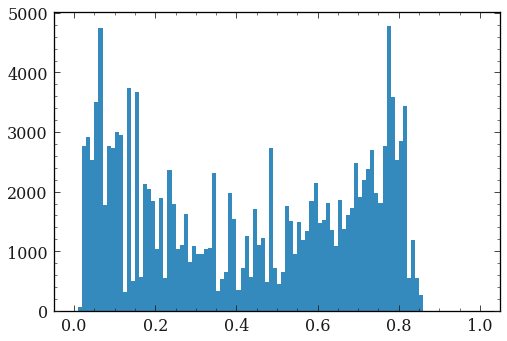

In [55]:
plt.hist(Pi0_selected_pd_df_bkg.Pi0_Prob2, bins=np.linspace(0,1,101));

In [56]:
# file = '/media/jykim/T7/storage/01_recon/antiKstar/D0_massveto_v2_half_1_pre_signalMC_recon_mdst_antiKstar_*.root'
# file = '/media/jykim/T7/storage/01_recon/antiKstar/D0_massveto_v2_half_1_sig_ext_signalMC_recon_mdst_antiKstar_*.root'
# file = '/media/jykim/T7/storage/01_recon/rho/D0_massveto_v2_half_1_pre_signalMC_recon_mdst_rho_*.root'
# file = '/media/jykim/T7/storage/01_recon/rho/D0_massveto_v2_half_1_sig_ext_signalMC_recon_mdst_rho_*.root'


file = '/home/belle2/jaeyoung/storage_ghi/Ntuples_ghi/D2phigamma/preext_maxFBDT_2ndFBDT_D2phigamma_mdst_100000_*.root'
# file = '/media/jykim/T7/storage/Ntuples_ghi/D2omegagamma/preext_maxFBDT_2ndFBDT_D2omegagamma_mdst_100000_*.root'

# base_filter='Dstarp_isSignal==1'
# base_filter+='& D0_M>1.8 & D0_M<1.9'
# base_filter+='& D0_M>1.67 & D0_M<2.06'

pd_df_signal = get_pd(file=file, tree=tree,variables=variables ,base_filter=sig_base_filter)

# pd_df_signal['Max_base_50MeV'] = pd_df_signal[['Pi0_Prob_base', 'Pi0_Prob_50MeV']].max(axis=1)
# pd_df_signal['Max_base_75MeV'] = pd_df_signal[['Pi0_Prob_base', 'Pi0_Prob_75MeV']].max(axis=1)
# 
# pd_df_signal['Max_base_50MeV_75MeV'] = pd_df_signal[['Pi0_Prob_base', 'Pi0_Prob_50MeV','Pi0_Prob_75MeV']].max(axis=1)

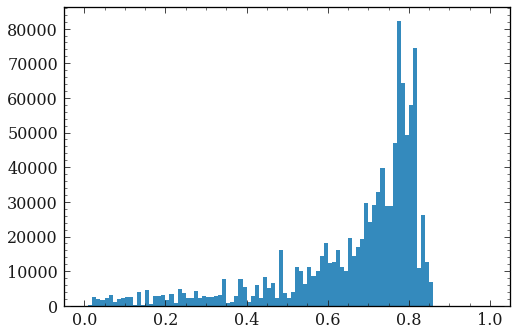

In [57]:
plt.hist(pd_df_signal.Pi0_Prob2, bins=np.linspace(0,1,101));

In [58]:
cut_var = 'Pi0_Prob2'
df_Pi0_Prob2 = df_fbdt_eff_rej_sig_1(df_signal=pd_df_signal,df_bkg=Pi0_selected_pd_df_bkg,cut_var=cut_var, step=0.001)

{'sig_eff': [], 'bkg_rej': []}


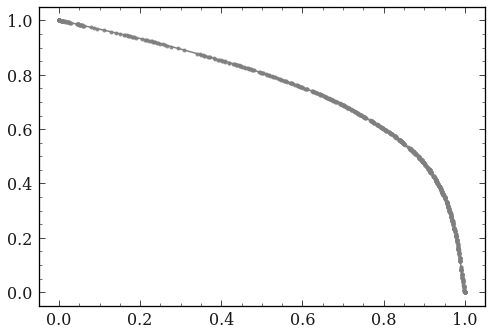

In [60]:
plt.scatter(df_Pi0_Prob2.sig_eff, df_Pi0_Prob2.bkg_rej, alpha=0.8, marker='.',color=mycolormap[7],label=r'B. BDT using a,b,c')
plt.plot(df_Pi0_Prob2.sig_eff.values, df_Pi0_Prob2.bkg_rej.values,color=mycolormap[7])


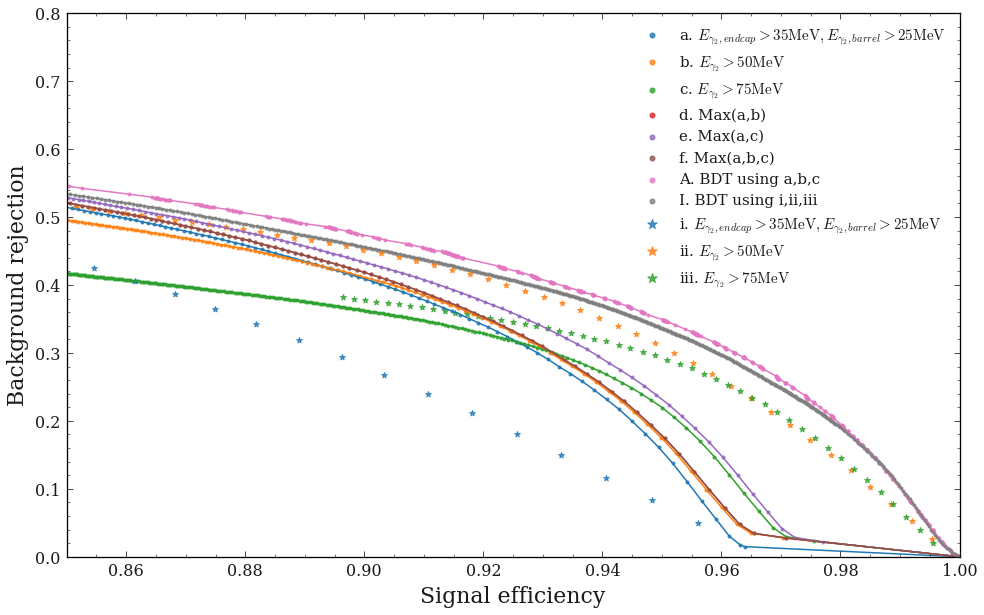

In [67]:
plt.figure(figsize=(16, 10))

plt.scatter(df_base.sig_eff, df_base.bkg_rej , alpha=0.8, marker='.',color=mycolormap[0],label=r'a. $E_{\gamma_2,endcap}>35\mathrm{MeV},E_{\gamma_2,barrel}>25\mathrm{MeV}$')
plt.scatter(df_fbdt_50MeV.sig_eff, df_fbdt_50MeV.bkg_rej, alpha=0.8, marker='.',color=mycolormap[1],label=r'b. $E_{\gamma_2}>50\mathrm{MeV}$')
plt.scatter(df_fbdt_75MeV.sig_eff, df_fbdt_75MeV.bkg_rej, alpha=0.8, marker='.',color=mycolormap[2],label=r'c. $E_{\gamma_2}>75\mathrm{MeV}$')
plt.scatter(df_Max_base_50MeV.sig_eff, df_Max_base_50MeV.bkg_rej, alpha=0.8, marker='.',color=mycolormap[3],label=r'd. Max(a,b)')
plt.scatter(df_Max_base_75MeV.sig_eff, df_Max_base_75MeV.bkg_rej, alpha=0.8, marker='.',color=mycolormap[4],label=r'e. Max(a,c)')
plt.scatter(df_Max_base_50MeV_75MeV.sig_eff, df_Max_base_50MeV_75MeV.bkg_rej, alpha=0.8, marker='.',color=mycolormap[5],label=r'f. Max(a,b,c)')
plt.scatter(df_Pi0_Prob2.sig_eff, df_Pi0_Prob2.bkg_rej, alpha=0.8, marker='.',color=mycolormap[6],label=r'A. BDT using a,b,c')
plt.scatter(df_mass_Pi0_Prob.sig_eff, df_mass_Pi0_Prob.bkg_rej, alpha=0.8, marker='.',color=mycolormap[7],label=r'I. BDT using i,ii,iii')


plt.plot(df_base.sig_eff.values, df_base.bkg_rej.values,color=mycolormap[0])
plt.plot(df_fbdt_50MeV.sig_eff.values, df_fbdt_50MeV.bkg_rej.values,color=mycolormap[1])
plt.plot(df_fbdt_75MeV.sig_eff.values, df_fbdt_75MeV.bkg_rej.values,color=mycolormap[2])
plt.plot(df_Max_base_50MeV.sig_eff.values, df_Max_base_50MeV.bkg_rej.values,color=mycolormap[3])
plt.plot(df_Max_base_75MeV.sig_eff.values, df_Max_base_75MeV.bkg_rej.values,color=mycolormap[4])
plt.plot(df_Max_base_50MeV_75MeV.sig_eff.values, df_Max_base_50MeV_75MeV.bkg_rej.values,color=mycolormap[5])
plt.plot(df_Pi0_Prob2.sig_eff.values, df_Pi0_Prob2.bkg_rej.values,color=mycolormap[6])
plt.plot(df_mass_Pi0_Prob.sig_eff.values, df_mass_Pi0_Prob.bkg_rej.values,color=mycolormap[7])


# plt.scatter(df_NN_Max_base_50MeV_75MeV.sig_eff, df_NN_Max_base_50MeV_75MeV.bkg_rej, alpha=0.8, marker='.',color=mycolormap[8],label=r'NN using a,b,c')
# plt.plot(df_NN_Max_base_50MeV_75MeV.sig_eff, df_NN_Max_base_50MeV_75MeV.bkg_rej,color=mycolormap[8])

# plt.scatter(df_hist_massveto.sig_eff, df_hist_massveto.bkg_rej, alpha=0.8, marker='.',color=mycolormap[9],label=r'Histgradient using i,ii,iii')
# plt.plot(df_hist_massveto.sig_eff, df_hist_massveto.bkg_rej,color=mycolormap[9])

# plt.scatter(df_max_many_vars.sig_eff, df_max_many_vars.bkg_rej, alpha=0.8, marker='.',color=mycolormap[0],label=r'Histgradient using max_many_vars a,b,c')
# plt.plot(df_max_many_vars.sig_eff, df_max_many_vars.bkg_rej,color=mycolormap[0])



plt.scatter(df_massveto_base.sig_eff, df_massveto_base.bkg_rej , alpha=0.8, marker='*',color=mycolormap[0],label=r'i. $E_{\gamma_2,endcap}>35\mathrm{MeV},E_{\gamma_2,barrel}>25\mathrm{MeV}$')
plt.scatter(df_massveto_50MeV.sig_eff, df_massveto_50MeV.bkg_rej , alpha=0.8, marker='*',color=mycolormap[1],label=r'ii. $E_{\gamma_2}>50\mathrm{MeV}$')
plt.scatter(df_massveto_75MeV.sig_eff, df_massveto_75MeV.bkg_rej, alpha=0.8, marker='*',color=mycolormap[2],label=r'iii. $E_{\gamma_2}>75\mathrm{MeV}$')

# plt.scatter(0.91,0.6)

ax = plt.gca()
ax.set_xlim(0.85,1) 
# ax.set_xlim(0,1)   
# ax.set_ylim(0.,0.65)

ax.set_ylim(0.,0.8)

# ax.set_xlim(0.,1) 
# ax.set_ylim(0.,1)


ax.set_xlabel('Signal efficiency')
ax.set_ylabel('Background rejection')
# plt.legend()
# Add a legend with adjusted marker size
legend = plt.legend(fontsize=15)
for handle in legend.legendHandles:
    handle.set_sizes([100])  # Adjust the marker size here


# plt.tight_layout()

# img_path = "/home/jykim/Dropbox/saved_plots/pi0veto/result/ROC/"
# img_name = "ROC_11_kinds_allregion_231127.png"
# img_name = "ROC_try_signalregion_231205.png"

# plt.savefig(img_path + img_name)
plt.savefig("/home/belle2/jaeyoung/plots/2024_Jan_B2GM/20240129_11_kinds_sigregion_ROC.png")

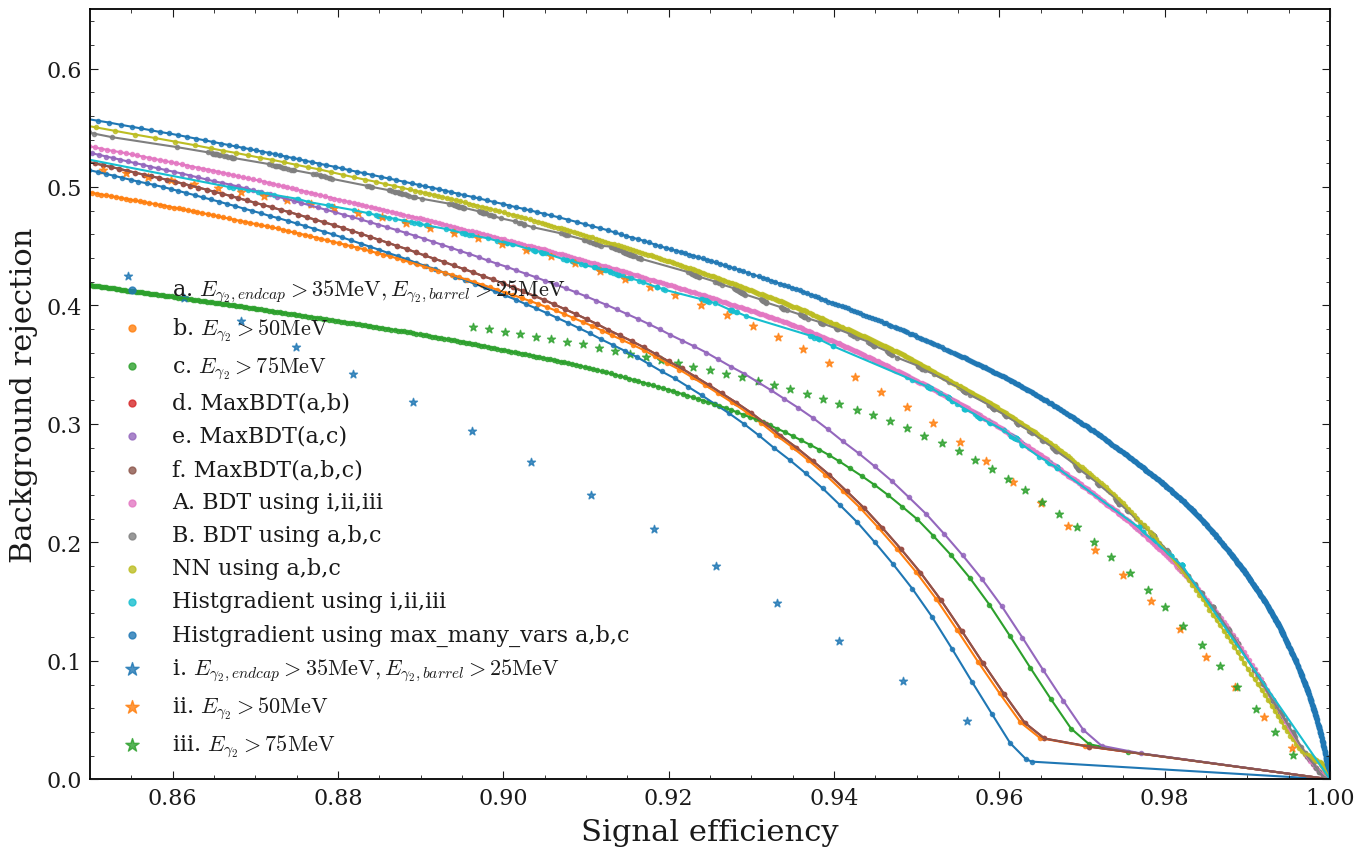

In [289]:
plt.figure(figsize=(16, 10))

plt.scatter(df_base.sig_eff, df_base.bkg_rej , alpha=0.8, marker='.',color=mycolormap[0],label=r'a. $E_{\gamma_2,endcap}>35\mathrm{MeV},E_{\gamma_2,barrel}>25\mathrm{MeV}$')
plt.scatter(df_fbdt_50MeV.sig_eff, df_fbdt_50MeV.bkg_rej, alpha=0.8, marker='.',color=mycolormap[1],label=r'b. $E_{\gamma_2}>50\mathrm{MeV}$')
plt.scatter(df_fbdt_75MeV.sig_eff, df_fbdt_75MeV.bkg_rej, alpha=0.8, marker='.',color=mycolormap[2],label=r'c. $E_{\gamma_2}>75\mathrm{MeV}$')
plt.scatter(df_Max_base_50MeV.sig_eff, df_Max_base_50MeV.bkg_rej, alpha=0.8, marker='.',color=mycolormap[3],label=r'd. MaxBDT(a,b)')
plt.scatter(df_Max_base_75MeV.sig_eff, df_Max_base_75MeV.bkg_rej, alpha=0.8, marker='.',color=mycolormap[4],label=r'e. MaxBDT(a,c)')
plt.scatter(df_Max_base_50MeV_75MeV.sig_eff, df_Max_base_50MeV_75MeV.bkg_rej, alpha=0.8, marker='.',color=mycolormap[5],label=r'f. MaxBDT(a,b,c)')
plt.scatter(df_mass_Pi0_Prob.sig_eff, df_mass_Pi0_Prob.bkg_rej, alpha=0.8, marker='.',color=mycolormap[6],label=r'A. BDT using i,ii,iii')
plt.scatter(df_Pi0_Prob2.sig_eff, df_Pi0_Prob2.bkg_rej, alpha=0.8, marker='.',color=mycolormap[7],label=r'B. BDT using a,b,c')


plt.plot(df_base.sig_eff, df_base.bkg_rej,color=mycolormap[0])
plt.plot(df_fbdt_50MeV.sig_eff, df_fbdt_50MeV.bkg_rej,color=mycolormap[1])
plt.plot(df_fbdt_75MeV.sig_eff, df_fbdt_75MeV.bkg_rej,color=mycolormap[2])
plt.plot(df_Max_base_50MeV.sig_eff, df_Max_base_50MeV.bkg_rej,color=mycolormap[3])
plt.plot(df_Max_base_75MeV.sig_eff, df_Max_base_75MeV.bkg_rej,color=mycolormap[4])
plt.plot(df_Max_base_50MeV_75MeV.sig_eff, df_Max_base_50MeV_75MeV.bkg_rej,color=mycolormap[5])
plt.plot(df_mass_Pi0_Prob.sig_eff, df_mass_Pi0_Prob.bkg_rej,color=mycolormap[6])
plt.plot(df_Pi0_Prob2.sig_eff, df_Pi0_Prob2.bkg_rej,color=mycolormap[7])


plt.scatter(df_NN_Max_base_50MeV_75MeV.sig_eff, df_NN_Max_base_50MeV_75MeV.bkg_rej, alpha=0.8, marker='.',color=mycolormap[8],label=r'NN using a,b,c')
plt.plot(df_NN_Max_base_50MeV_75MeV.sig_eff, df_NN_Max_base_50MeV_75MeV.bkg_rej,color=mycolormap[8])

plt.scatter(df_hist_massveto.sig_eff, df_hist_massveto.bkg_rej, alpha=0.8, marker='.',color=mycolormap[9],label=r'Histgradient using i,ii,iii')
plt.plot(df_hist_massveto.sig_eff, df_hist_massveto.bkg_rej,color=mycolormap[9])

plt.scatter(df_max_many_vars.sig_eff, df_max_many_vars.bkg_rej, alpha=0.8, marker='.',color=mycolormap[0],label=r'Histgradient using max_many_vars a,b,c')
plt.plot(df_max_many_vars.sig_eff, df_max_many_vars.bkg_rej,color=mycolormap[0])



plt.scatter(df_massveto_base.sig_eff, df_massveto_base.bkg_rej , alpha=0.8, marker='*',color=mycolormap[0],label=r'i. $E_{\gamma_2,endcap}>35\mathrm{MeV},E_{\gamma_2,barrel}>25\mathrm{MeV}$')
plt.scatter(df_massveto_50MeV.sig_eff, df_massveto_50MeV.bkg_rej , alpha=0.8, marker='*',color=mycolormap[1],label=r'ii. $E_{\gamma_2}>50\mathrm{MeV}$')
plt.scatter(df_massveto_75MeV.sig_eff, df_massveto_75MeV.bkg_rej, alpha=0.8, marker='*',color=mycolormap[2],label=r'iii. $E_{\gamma_2}>75\mathrm{MeV}$')

# plt.scatter(0.91,0.6)

ax = plt.gca()
ax.set_xlim(0.85,1) 
# ax.set_xlim(0,1)   
ax.set_ylim(0.,0.65)

# ax.set_ylim(0.,0.8)

# ax.set_xlim(0.,1) 
# ax.set_ylim(0.,1)


ax.set_xlabel('Signal efficiency')
ax.set_ylabel('Background rejection')
# plt.legend()
# Add a legend with adjusted marker size
legend = plt.legend()
for handle in legend.legendHandles:
    handle.set_sizes([100])  # Adjust the marker size here


# plt.tight_layout()

# img_path = "/home/jykim/Dropbox/saved_plots/pi0veto/result/ROC/"
# img_name = "ROC_11_kinds_allregion_231127.png"
# img_name = "ROC_try_signalregion_231205.png"

# plt.savefig(img_path + img_name)

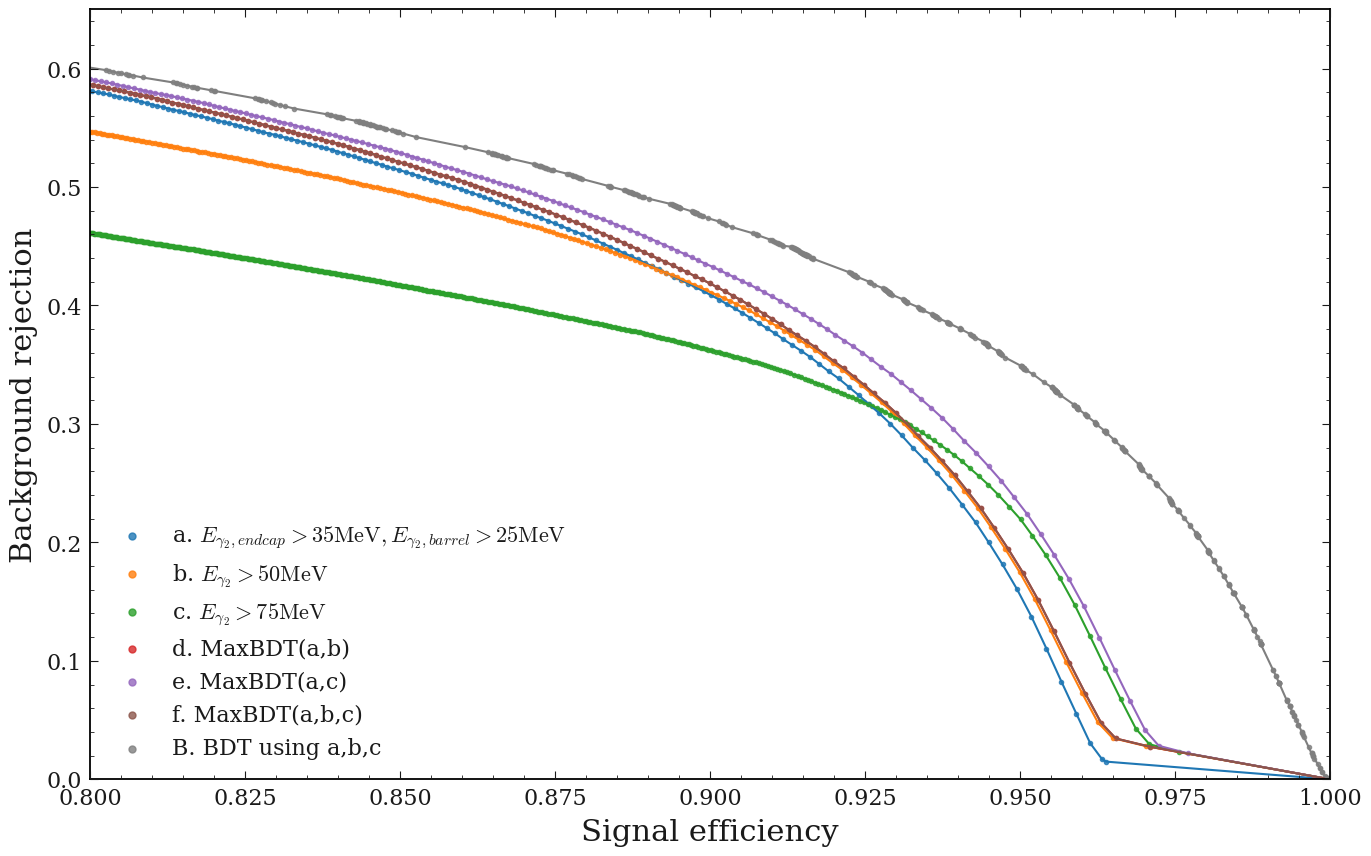

In [67]:
plt.figure(figsize=(16, 10))

plt.scatter(df_base.sig_eff, df_base.bkg_rej , alpha=0.8, marker='.',color=mycolormap[0],label=r'a. $E_{\gamma_2,endcap}>35\mathrm{MeV},E_{\gamma_2,barrel}>25\mathrm{MeV}$')
plt.scatter(df_fbdt_50MeV.sig_eff, df_fbdt_50MeV.bkg_rej, alpha=0.8, marker='.',color=mycolormap[1],label=r'b. $E_{\gamma_2}>50\mathrm{MeV}$')
plt.scatter(df_fbdt_75MeV.sig_eff, df_fbdt_75MeV.bkg_rej, alpha=0.8, marker='.',color=mycolormap[2],label=r'c. $E_{\gamma_2}>75\mathrm{MeV}$')
plt.scatter(df_Max_base_50MeV.sig_eff, df_Max_base_50MeV.bkg_rej, alpha=0.8, marker='.',color=mycolormap[3],label=r'd. MaxBDT(a,b)')
plt.scatter(df_Max_base_75MeV.sig_eff, df_Max_base_75MeV.bkg_rej, alpha=0.8, marker='.',color=mycolormap[4],label=r'e. MaxBDT(a,c)')
plt.scatter(df_Max_base_50MeV_75MeV.sig_eff, df_Max_base_50MeV_75MeV.bkg_rej, alpha=0.8, marker='.',color=mycolormap[5],label=r'f. MaxBDT(a,b,c)')
# plt.scatter(df_mass_Pi0_Prob.sig_eff, df_mass_Pi0_Prob.bkg_rej, alpha=0.8, marker='.',color=mycolormap[6],label=r'A. BDT using i,ii,iii')
plt.scatter(df_Pi0_Prob2.sig_eff, df_Pi0_Prob2.bkg_rej, alpha=0.8, marker='.',color=mycolormap[7],label=r'B. BDT using a,b,c')


plt.plot(df_base.sig_eff, df_base.bkg_rej,color=mycolormap[0])
plt.plot(df_fbdt_50MeV.sig_eff, df_fbdt_50MeV.bkg_rej,color=mycolormap[1])
plt.plot(df_fbdt_75MeV.sig_eff, df_fbdt_75MeV.bkg_rej,color=mycolormap[2])
plt.plot(df_Max_base_50MeV.sig_eff, df_Max_base_50MeV.bkg_rej,color=mycolormap[3])
plt.plot(df_Max_base_75MeV.sig_eff, df_Max_base_75MeV.bkg_rej,color=mycolormap[4])
plt.plot(df_Max_base_50MeV_75MeV.sig_eff, df_Max_base_50MeV_75MeV.bkg_rej,color=mycolormap[5])
# plt.plot(df_mass_Pi0_Prob.sig_eff, df_mass_Pi0_Prob.bkg_rej,color=mycolormap[6])
plt.plot(df_Pi0_Prob2.sig_eff, df_Pi0_Prob2.bkg_rej,color=mycolormap[7])



# plt.scatter(df_massveto_base.sig_eff, df_massveto_base.bkg_rej , alpha=0.8, marker='*',color=mycolormap[0],label=r'i. $E_{\gamma_2,endcap}>35\mathrm{MeV},E_{\gamma_2,barrel}>25\mathrm{MeV}$')
# plt.scatter(df_massveto_50MeV.sig_eff, df_massveto_50MeV.bkg_rej , alpha=0.8, marker='*',color=mycolormap[1],label=r'ii. $E_{\gamma_2}>50\mathrm{MeV}$')
# plt.scatter(df_massveto_75MeV.sig_eff, df_massveto_75MeV.bkg_rej, alpha=0.8, marker='*',color=mycolormap[2],label=r'iii. $E_{\gamma_2}>75\mathrm{MeV}$')

# plt.scatter(0.91,0.6)

ax = plt.gca()
ax.set_xlim(0.8,1) 
# ax.set_xlim(0,1)   
ax.set_ylim(0.,0.65)

# ax.set_ylim(0.,0.8)

# ax.set_xlim(0.,1) 
# ax.set_ylim(0.,1)


ax.set_xlabel('Signal efficiency')
ax.set_ylabel('Background rejection')
# plt.legend()
# Add a legend with adjusted marker size
legend = plt.legend()
for handle in legend.legendHandles:
    handle.set_sizes([100])  # Adjust the marker size here


# plt.tight_layout()

# img_path = "/home/jykim/Dropbox/saved_plots/pi0veto/result/ROC/"
# img_name = "ROC_11_kinds_allregion_231127.png"
# img_name = "ROC_pure_BDT_signalregion_231127.png"

# plt.savefig(img_path + img_name)

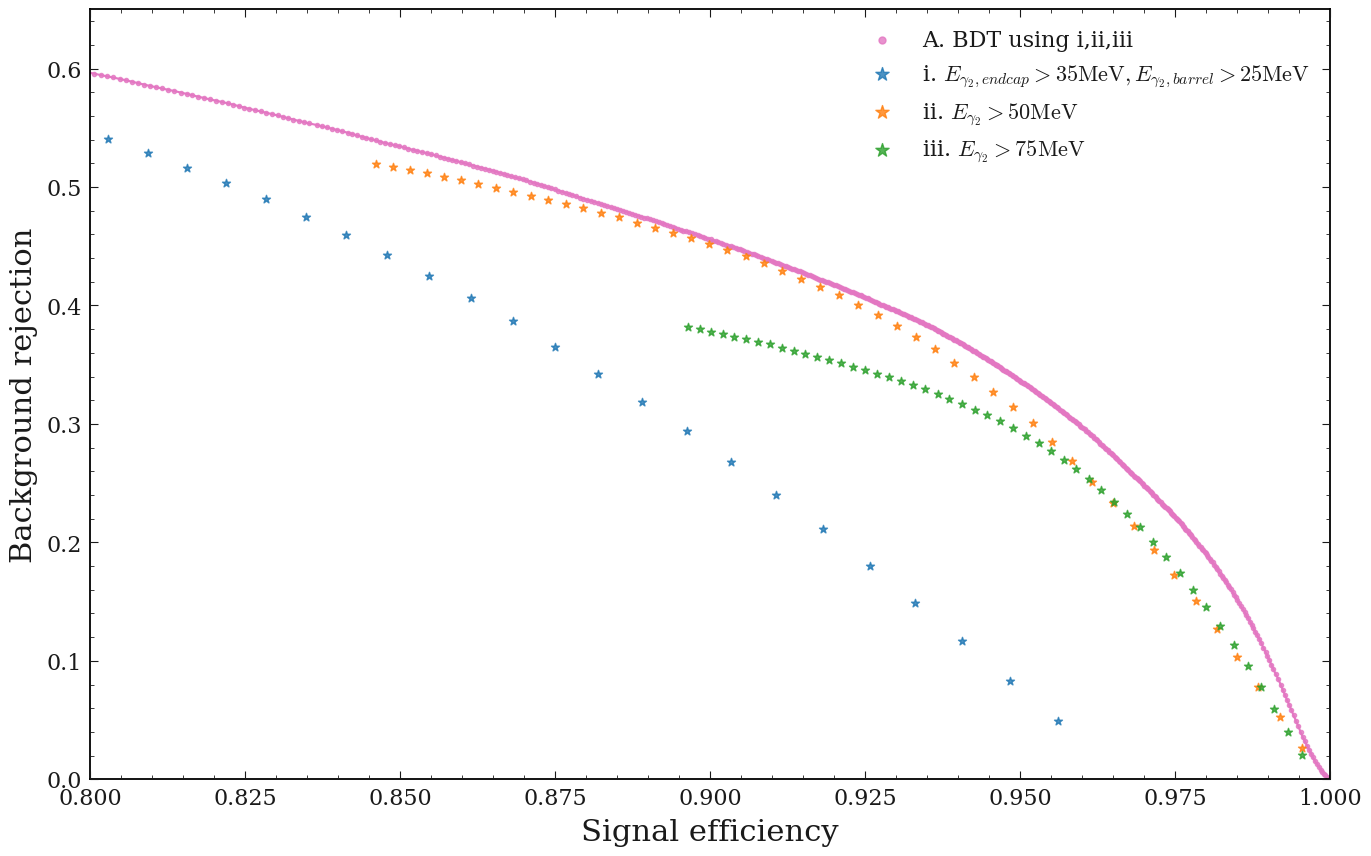

In [68]:
plt.figure(figsize=(16, 10))

# plt.scatter(df_base.sig_eff, df_base.bkg_rej , alpha=0.8, marker='.',color=mycolormap[0],label=r'a. $E_{\gamma_2,endcap}>35\mathrm{MeV},E_{\gamma_2,barrel}>25\mathrm{MeV}$')
# plt.scatter(df_fbdt_50MeV.sig_eff, df_fbdt_50MeV.bkg_rej, alpha=0.8, marker='.',color=mycolormap[1],label=r'b. $E_{\gamma_2}>50\mathrm{MeV}$')
# plt.scatter(df_fbdt_75MeV.sig_eff, df_fbdt_75MeV.bkg_rej, alpha=0.8, marker='.',color=mycolormap[2],label=r'c. $E_{\gamma_2}>75\mathrm{MeV}$')
# plt.scatter(df_Max_base_50MeV.sig_eff, df_Max_base_50MeV.bkg_rej, alpha=0.8, marker='.',color=mycolormap[3],label=r'd. MaxBDT(a,b)')
# plt.scatter(df_Max_base_75MeV.sig_eff, df_Max_base_75MeV.bkg_rej, alpha=0.8, marker='.',color=mycolormap[4],label=r'e. MaxBDT(a,c)')
# plt.scatter(df_Max_base_50MeV_75MeV.sig_eff, df_Max_base_50MeV_75MeV.bkg_rej, alpha=0.8, marker='.',color=mycolormap[5],label=r'f. MaxBDT(a,b,c)')
plt.scatter(df_mass_Pi0_Prob.sig_eff, df_mass_Pi0_Prob.bkg_rej, alpha=0.8, marker='.',color=mycolormap[6],label=r'A. BDT using i,ii,iii')
# plt.scatter(df_Pi0_Prob2.sig_eff, df_Pi0_Prob2.bkg_rej, alpha=0.8, marker='.',color=mycolormap[7],label=r'B. BDT using a,b,c')


# plt.plot(df_base.sig_eff, df_base.bkg_rej,color=mycolormap[0])
# plt.plot(df_fbdt_50MeV.sig_eff, df_fbdt_50MeV.bkg_rej,color=mycolormap[1])
# plt.plot(df_fbdt_75MeV.sig_eff, df_fbdt_75MeV.bkg_rej,color=mycolormap[2])
# plt.plot(df_Max_base_50MeV.sig_eff, df_Max_base_50MeV.bkg_rej,color=mycolormap[3])
# plt.plot(df_Max_base_75MeV.sig_eff, df_Max_base_75MeV.bkg_rej,color=mycolormap[4])
# plt.plot(df_Max_base_50MeV_75MeV.sig_eff, df_Max_base_50MeV_75MeV.bkg_rej,color=mycolormap[5])
plt.plot(df_mass_Pi0_Prob.sig_eff, df_mass_Pi0_Prob.bkg_rej,color=mycolormap[6])
# plt.plot(df_Pi0_Prob2.sig_eff, df_Pi0_Prob2.bkg_rej,color=mycolormap[7])



plt.scatter(df_massveto_base.sig_eff, df_massveto_base.bkg_rej , alpha=0.8, marker='*',color=mycolormap[0],label=r'i. $E_{\gamma_2,endcap}>35\mathrm{MeV},E_{\gamma_2,barrel}>25\mathrm{MeV}$')
plt.scatter(df_massveto_50MeV.sig_eff, df_massveto_50MeV.bkg_rej , alpha=0.8, marker='*',color=mycolormap[1],label=r'ii. $E_{\gamma_2}>50\mathrm{MeV}$')
plt.scatter(df_massveto_75MeV.sig_eff, df_massveto_75MeV.bkg_rej, alpha=0.8, marker='*',color=mycolormap[2],label=r'iii. $E_{\gamma_2}>75\mathrm{MeV}$')

# plt.scatter(0.91,0.6)

ax = plt.gca()
ax.set_xlim(0.8,1) 
# ax.set_xlim(0,1)   
ax.set_ylim(0.,0.65)

# ax.set_ylim(0.,0.8)

# ax.set_xlim(0.,1) 
# ax.set_ylim(0.,1)


ax.set_xlabel('Signal efficiency')
ax.set_ylabel('Background rejection')
# plt.legend()
# Add a legend with adjusted marker size
legend = plt.legend()
for handle in legend.legendHandles:
    handle.set_sizes([100])  # Adjust the marker size here


# plt.tight_layout()

# img_path = "/home/jykim/Dropbox/saved_plots/pi0veto/result/ROC/"
# # img_name = "ROC_11_kinds_allregion_231127.png"
# img_name = "ROC_massveto_signalregion_231127.png"

plt.savefig(img_path + img_name)

### max FBDT로 2번 FBDT. signal region vs. all region

In [2]:
base_file = '/home/belle2/jaeyoung/storage_ghi/Ntuples_ghi/D2phipi0/'
# base_file = '/media/jykim/T7/storage/Ntuples_ghi/D2omegapi0/'

file_list=str()
file_list = base_file + 'preext_maxFBDT_2ndFBDT_D2phipi0_mdst_100000_*.root'
# file_list = base_file + 'preext_maxFBDT_2ndFBDT_D2omegapi0_mdst_100000_*.root'

tree='phi'
# tree='omega'

# base_filter='D0_M>1.67 & D0_M<2.06'
# base_filter='D0_M>0'
 
# # base_filter='D0_M>1.8 & D0_M<1.9'
fitting_region='D0_M>1.67 & D0_M<2.06'

variables = ['Pi0_Prob2','D0_M','Pi0_Prob_base','Pi0_Prob_50MeV','Pi0_Prob_75MeV','D0_cosHel_0']

In [3]:
# massveto_pd_all = get_pd_file_list(file_list=file_list, tree=tree, base_filter=base_filter, variables=variables)
massveto_pd_all = get_pd(file=file_list, tree=tree, base_filter=fitting_region, variables=variables)
# massveto_pd_all['Max_base_50MeV'] = massveto_pd_all[['Pi0_Prob_base', 'Pi0_Prob_50MeV']].max(axis=1)
# massveto_pd_all['Max_base_75MeV'] = massveto_pd_all[['Pi0_Prob_base', 'Pi0_Prob_75MeV']].max(axis=1)
# massveto_pd_all['Max_base_50MeV_75MeV'] = massveto_pd_all[['Pi0_Prob_base', 'Pi0_Prob_50MeV','Pi0_Prob_75MeV']].max(axis=1)

input_line_79:10:7: warning: ignoring return value of function declared with 'nodiscard' attribute [-Wunused-result]
      ((const vector<double>*)obj)->empty();
      ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [4]:
# Pi0_bkg_cuts = 'gamma_genMotherPDG==111'
Pi0_bkg_cuts = 'D0_M>0'
# Pi0_bkg_cuts += ' & abs(Dstarp_Q-0.00593)<0.0006 & abs(antiKstar_M - 0.89555)< 0.06 & Dstarp_CMS_p>2.4'
Pi0_selected_pd_df_bkg = massveto_pd_all.query(Pi0_bkg_cuts)

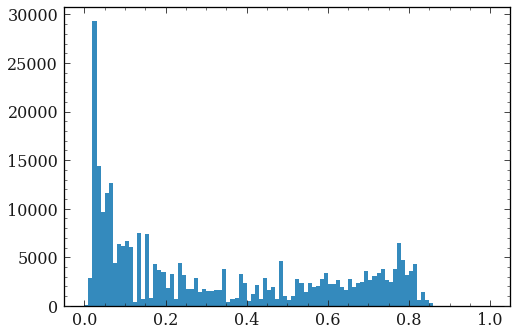

In [5]:
plt.hist(Pi0_selected_pd_df_bkg.Pi0_Prob2, bins=np.linspace(0,1,101));

In [6]:
# file = '/media/jykim/T7/storage/01_recon/antiKstar/D0_massveto_v2_half_1_pre_signalMC_recon_mdst_antiKstar_*.root'
# file = '/media/jykim/T7/storage/01_recon/antiKstar/D0_massveto_v2_half_1_sig_ext_signalMC_recon_mdst_antiKstar_*.root'
# file = '/media/jykim/T7/storage/01_recon/rho/D0_massveto_v2_half_1_pre_signalMC_recon_mdst_rho_*.root'
# file = '/media/jykim/T7/storage/01_recon/rho/D0_massveto_v2_half_1_sig_ext_signalMC_recon_mdst_rho_*.root'


file = '/home/belle2/jaeyoung/storage_ghi/Ntuples_ghi/D2phigamma/preext_maxFBDT_2ndFBDT_D2phigamma_mdst_100000_*.root'
# file = '/media/jykim/T7/storage/Ntuples_ghi/D2omegagamma/preext_maxFBDT_2ndFBDT_D2omegagamma_mdst_100000_*.root'

sig_fitting_region='Dstarp_isSignal==1 & D0_M>1.67 & D0_M<2.06'

pd_df_signal = get_pd(file=file, tree=tree,variables=variables ,base_filter=sig_fitting_region)

# pd_df_signal['Max_base_50MeV'] = pd_df_signal[['Pi0_Prob_base', 'Pi0_Prob_50MeV']].max(axis=1)
# pd_df_signal['Max_base_75MeV'] = pd_df_signal[['Pi0_Prob_base', 'Pi0_Prob_75MeV']].max(axis=1)
# 
# pd_df_signal['Max_base_50MeV_75MeV'] = pd_df_signal[['Pi0_Prob_base', 'Pi0_Prob_50MeV','Pi0_Prob_75MeV']].max(axis=1)

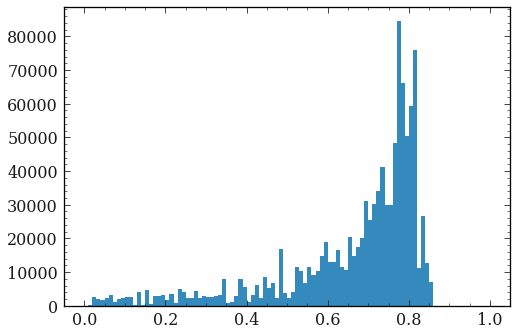

In [7]:
plt.hist(pd_df_signal.Pi0_Prob2, bins=np.linspace(0,1,101));

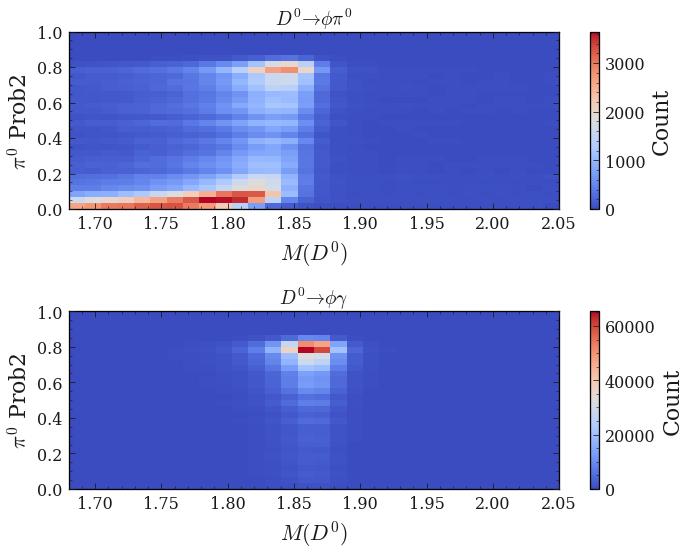

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already imported your data into these DataFrames:
# Pi0_selected_pd_df_bkg
# pd_df_signal

# Sample data generation for demonstration purpose
# Replace this with your actual data
# Pi0_selected_pd_df_bkg = pd.DataFrame({'D0_M': np.random.uniform(1.68, 2.05, 1000),
#                                        'Pi0_Prob2': np.random.rand(1000)})
# pd_df_signal = pd.DataFrame({'D0_M': np.random.uniform(1.68, 2.05, 1000),
#                              'Pi0_Prob2': np.random.rand(1000)})

# Set up the figure and axis
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Plot histogram for Pi0_selected_pd_df_bkg
hist1 = axes[0].hist2d(Pi0_selected_pd_df_bkg['D0_M'], Pi0_selected_pd_df_bkg['Pi0_Prob2'], bins=30, cmap='coolwarm', range=[[1.68, 2.05], [0, 1]])
axes[0].set_title(r'$D^0 \to \phi \pi^0$')
axes[0].set_xlabel(r'$M(D^0)$')
axes[0].set_ylabel('$\pi^0$ Prob2')
fig.colorbar(hist1[3], ax=axes[0], label='Count')

# Plot histogram for pd_df_signal
hist2 = axes[1].hist2d(pd_df_signal['D0_M'], pd_df_signal['Pi0_Prob2'], bins=30, cmap='coolwarm', range=[[1.68, 2.05], [0, 1]])
axes[1].set_title(r'$D^0 \to \phi \gamma$')
axes[1].set_xlabel(r'$M(D^0)$')
axes[1].set_ylabel('$\pi^0$ Prob2')
fig.colorbar(hist2[3], ax=axes[1], label='Count')

plt.tight_layout()
plt.savefig("/home/belle2/jaeyoung/plots/2024_Jan_B2GM/20240129_2d_D0M_pi0prob2.png")
plt.show()


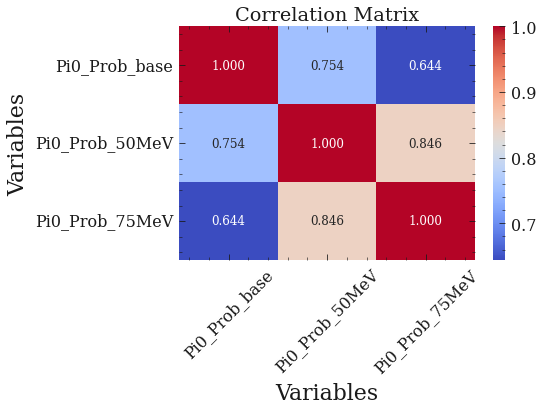

In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already imported your data into these DataFrames:
# Pi0_selected_pd_df_bkg
# pd_df_signal

# Sample data generation for demonstration purpose
# Replace this with your actual data
# Pi0_selected_pd_df_bkg = pd.DataFrame(...)
# pd_df_signal = pd.DataFrame(...)

# Select the variables of interest for correlation analysis
variables = ['Pi0_Prob_base', 'Pi0_Prob_50MeV', 'Pi0_Prob_75MeV']

# Concatenate the two DataFrames vertically for combined analysis
combined_df = pd.concat([Pi0_selected_pd_df_bkg[variables], pd_df_signal[variables]], axis=0)

# Calculate the correlation matrix
correlation_matrix = combined_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", annot_kws={"size": 12})
plt.title('Correlation Matrix')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("/home/belle2/jaeyoung/plots/2024_Jan_B2GM/20240129_pi0prob2_variables_correlation_matrix.png")

plt.show()


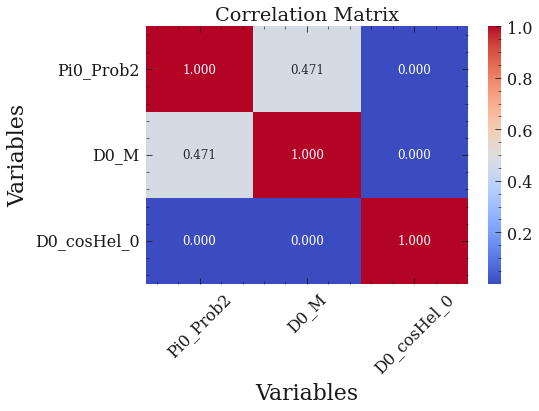

In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already imported your data into these DataFrames:
# Pi0_selected_pd_df_bkg
# pd_df_signal

# Sample data generation for demonstration purpose
# Replace this with your actual data
# Pi0_selected_pd_df_bkg = pd.DataFrame(...)
# pd_df_signal = pd.DataFrame(...)

# Select the variables of interest for correlation analysis
variables = ['Pi0_Prob2', 'D0_M','D0_cosHel_0']

# Concatenate the two DataFrames vertically for combined analysis
combined_df = pd.concat([Pi0_selected_pd_df_bkg[variables], pd_df_signal[variables]], axis=0)

# Calculate the correlation matrix
correlation_matrix = combined_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", annot_kws={"size": 12})
plt.title('Correlation Matrix')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.xticks(rotation=45)
plt.yticks(rotation=0) 
plt.tight_layout()
plt.savefig("/home/belle2/jaeyoung/plots/2024_Jan_B2GM/20240129_pi0prob2_correlation_matrix.png")

plt.show()


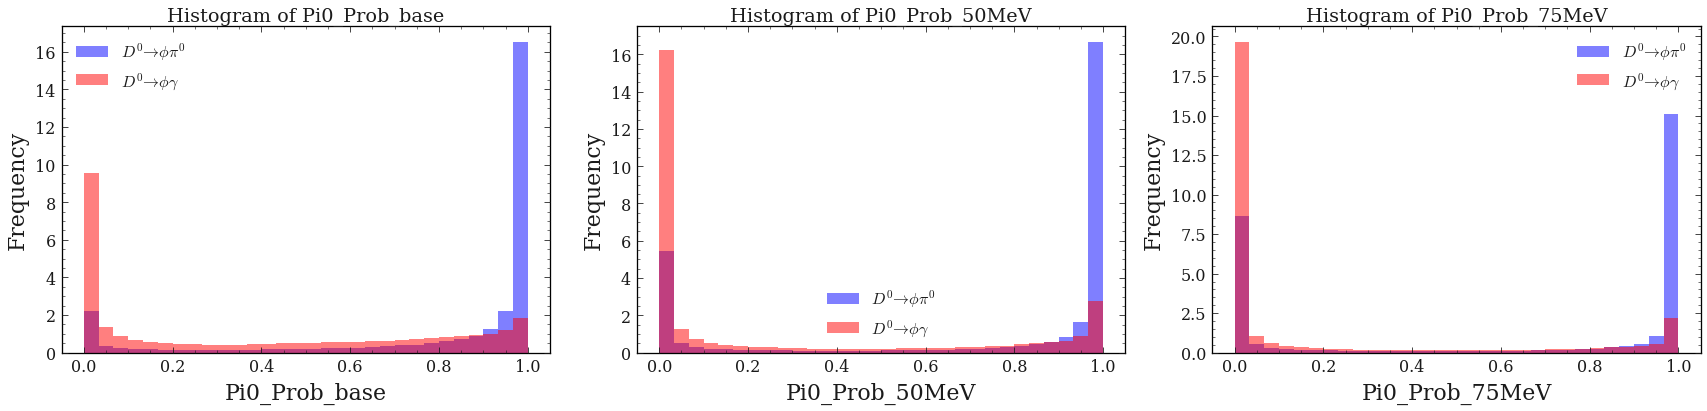

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already imported your data into these DataFrames:
# Pi0_selected_pd_df_bkg
# pd_df_signal

# Sample data generation for demonstration purpose
# Replace this with your actual data
# Pi0_selected_pd_df_bkg = pd.DataFrame(...)
# pd_df_signal = pd.DataFrame(...)

# Variables of interest
variables = ['Pi0_Prob_base', 'Pi0_Prob_50MeV', 'Pi0_Prob_75MeV']

# Create subplots for each variable
fig, axes = plt.subplots(ncols=len(variables), nrows=1, figsize=(8*len(variables),6))

# Plot histograms for each variable in the same canvas
for i, variable in enumerate(variables):
    # Plot histograms for Pi0_selected_pd_df_bkg
    axes[i].hist(Pi0_selected_pd_df_bkg[variable], bins=30, color='blue', alpha=0.5, label=r'$D^0 \to \phi \pi^0$', density=True)
    # Plot histograms for pd_df_signal
    axes[i].hist(pd_df_signal[variable], bins=30, color='red', alpha=0.5, label=r'$D^0 \to \phi \gamma$', density=True)
    axes[i].set_title(f'Histogram of {variable}')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
    plt.tight_layout()
    img_name="/home/belle2/jaeyoung/plots/2024_Jan_B2GM/20240129_pi0prob2_output_" + str(variable)  + ".png"
    plt.savefig(img_name)


# Adjust layout and show plots
plt.tight_layout()
plt.show()


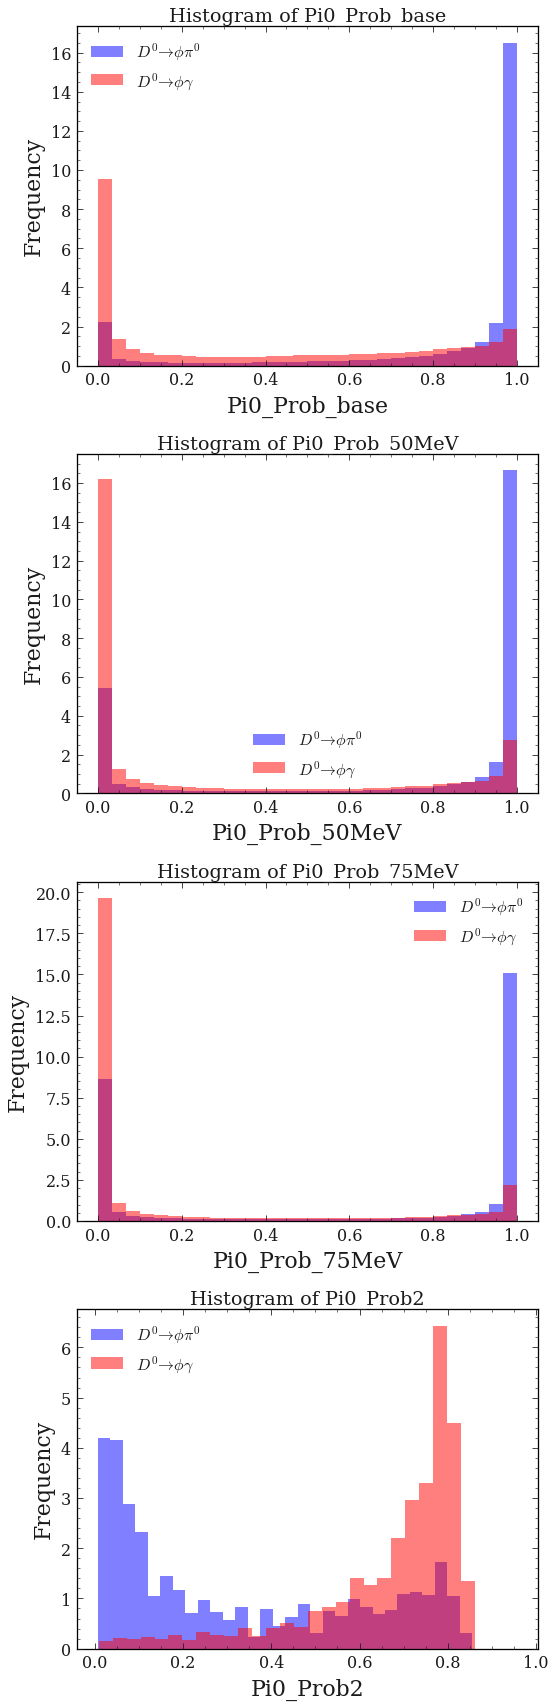

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already imported your data into these DataFrames:
# Pi0_selected_pd_df_bkg
# pd_df_signal

# Sample data generation for demonstration purpose
# Replace this with your actual data
# Pi0_selected_pd_df_bkg = pd.DataFrame(...)
# pd_df_signal = pd.DataFrame(...)

# Variables of interest
variables = ['Pi0_Prob_base', 'Pi0_Prob_50MeV', 'Pi0_Prob_75MeV','Pi0_Prob2']

# Create subplots for each variable
fig, axes = plt.subplots(nrows=len(variables), ncols=1, figsize=(8, 6*len(variables)))

# Plot histograms for each variable in the same canvas
for i, variable in enumerate(variables):
    # Plot histograms for Pi0_selected_pd_df_bkg
    axes[i].hist(Pi0_selected_pd_df_bkg[variable], bins=30, color='blue', alpha=0.5, label=r'$D^0 \to \phi \pi^0$', density=True)
    # Plot histograms for pd_df_signal
    axes[i].hist(pd_df_signal[variable], bins=30, color='red', alpha=0.5, label=r'$D^0 \to \phi \gamma$', density=True)
    axes[i].set_title(f'Histogram of {variable}')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
    plt.tight_layout()
    img_name="/home/belle2/jaeyoung/plots/2024_Jan_B2GM/20240129_pi0prob2_output_" + str(variable)  + ".png"
    plt.savefig(img_name)


# Adjust layout and show plots
plt.tight_layout()
plt.show()


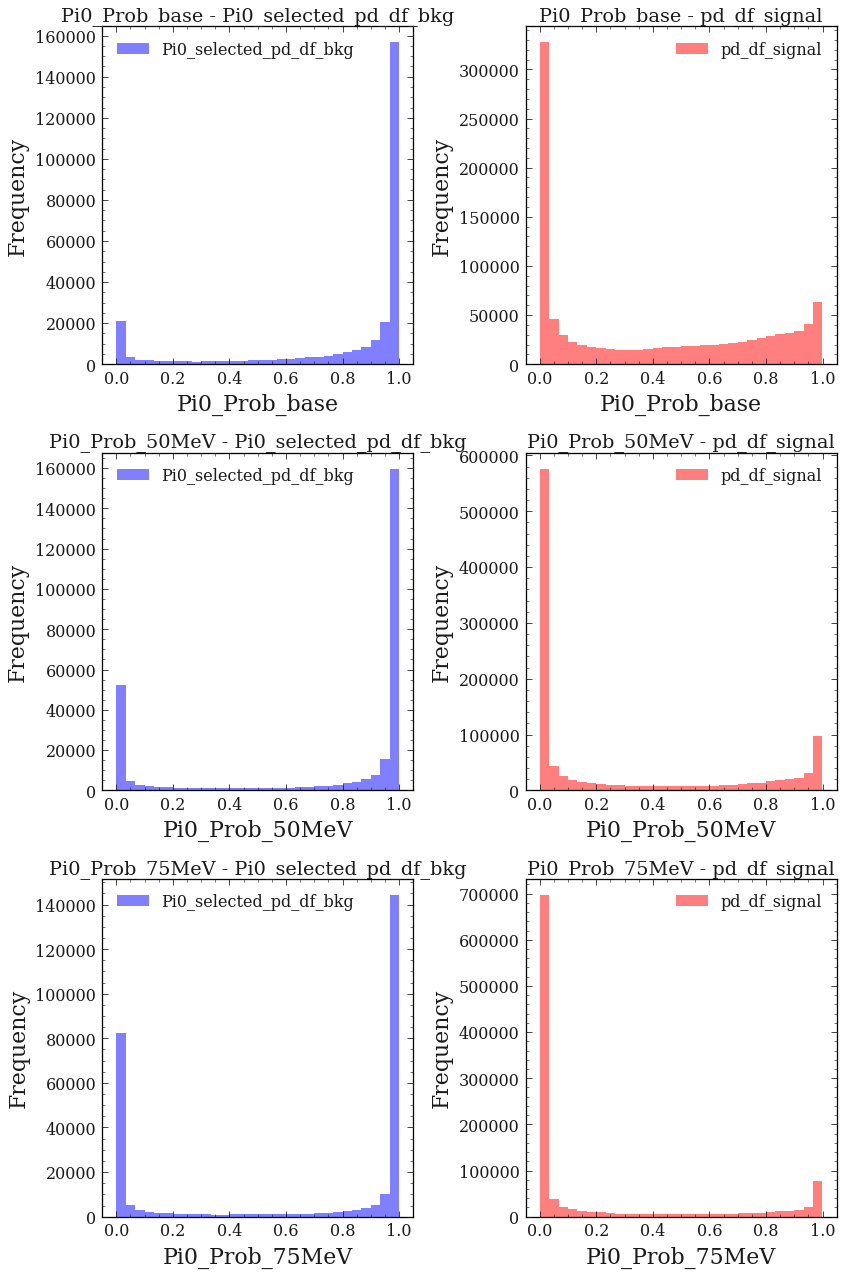

In [115]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already imported your data into these DataFrames:
# Pi0_selected_pd_df_bkg
# pd_df_signal

# Sample data generation for demonstration purpose
# Replace this with your actual data
# Pi0_selected_pd_df_bkg = pd.DataFrame(...)
# pd_df_signal = pd.DataFrame(...)

# Variables of interest
variables = ['Pi0_Prob_base', 'Pi0_Prob_50MeV', 'Pi0_Prob_75MeV']

# Create subplots for each variable
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 18))

# Plot histograms for each variable in each dataframe
for i, variable in enumerate(variables):
    # Plot histograms for Pi0_selected_pd_df_bkg
    axes[i, 0].hist(Pi0_selected_pd_df_bkg[variable], bins=30, color='blue', alpha=0.5, label='Pi0_selected_pd_df_bkg')
    axes[i, 0].set_title(f'{variable} - Pi0_selected_pd_df_bkg')
    axes[i, 0].set_xlabel(variable)
    axes[i, 0].set_ylabel('Frequency')
    axes[i, 0].legend()

    # Plot histograms for pd_df_signal
    axes[i, 1].hist(pd_df_signal[variable], bins=30, color='red', alpha=0.5, label='pd_df_signal')
    axes[i, 1].set_title(f'{variable} - pd_df_signal')
    axes[i, 1].set_xlabel(variable)
    axes[i, 1].set_ylabel('Frequency')
    axes[i, 1].legend()

# Adjust layout and show plots
plt.tight_layout()
plt.show()


In [74]:
cut_var = 'Pi0_Prob2'
df_Pi0_Prob2_fitting_region = df_fbdt_eff_rej_sig_1(df_signal=pd_df_signal,df_bkg=Pi0_selected_pd_df_bkg,cut_var=cut_var, step=0.001)

{'sig_eff': [], 'bkg_rej': []}


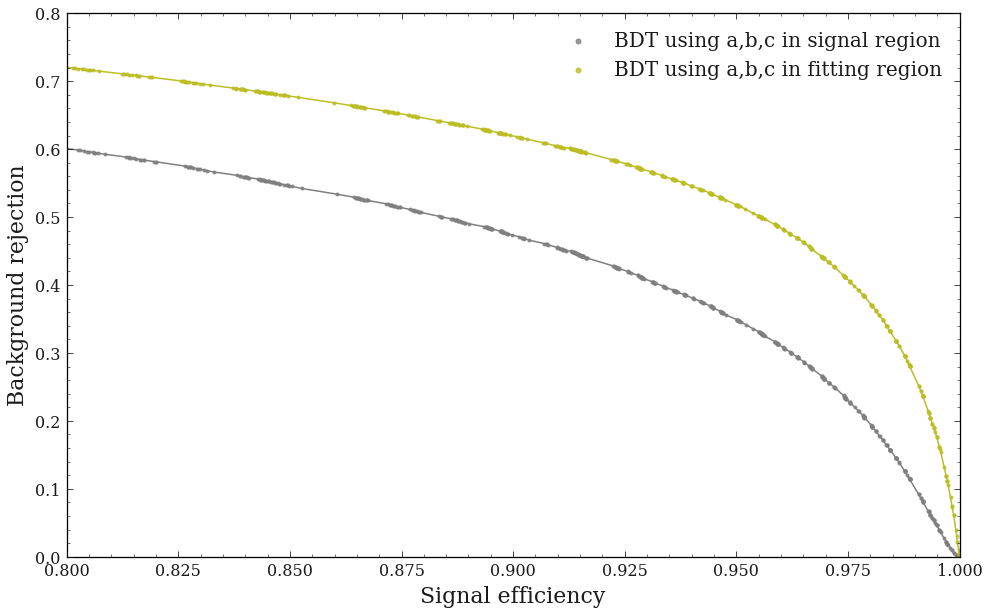

In [79]:
plt.figure(figsize=(16, 10))


plt.scatter(df_Pi0_Prob2.sig_eff, df_Pi0_Prob2.bkg_rej, alpha=0.8, marker='.',color=mycolormap[7],label=r'BDT using a,b,c in signal region')
plt.scatter(df_Pi0_Prob2_fitting_region.sig_eff, df_Pi0_Prob2_fitting_region.bkg_rej, alpha=0.8, marker='.',color=mycolormap[8],label=r'BDT using a,b,c in fitting region')



plt.plot(df_Pi0_Prob2.sig_eff.values, df_Pi0_Prob2.bkg_rej.values,color=mycolormap[7])
plt.plot(df_Pi0_Prob2_fitting_region.sig_eff.values, df_Pi0_Prob2_fitting_region.bkg_rej.values,color=mycolormap[8])

ax = plt.gca()
ax.set_xlim(0.8,1) 
# ax.set_xlim(0,1)   
# ax.set_ylim(0.,0.65)

ax.set_ylim(0.,0.8)

# ax.set_xlim(0.,1) 
# ax.set_ylim(0.,1)


ax.set_xlabel('Signal efficiency')
ax.set_ylabel('Background rejection')
# plt.legend()
# Add a legend with adjusted marker size
legend = plt.legend(fontsize=20)
for handle in legend.legendHandles:
    handle.set_sizes([100])  # Adjust the marker size here


# plt.tight_layout()

img_path = "/home/jykim/Dropbox/saved_plots/pi0veto/result/ROC/"
# img_name = "ROC_11_kinds_allregion_231127.png"
img_name = "ROC_BDT_using_abc_fittingregion_231130.png"

# plt.savefig(img_path + img_name)

plt.savefig("/home/belle2/jaeyoung/plots/2024_Jan_B2GM/ROC_BDT_using_abc_fittingregion_240129.png")